# Open Exploration (Disaggregated Outcomes)

... [add NB description] ...

## 1. Model and dependency import

In [1]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ema_workbench import (Scenario, Policy, MultiprocessingEvaluator, perform_experiments, ema_logging)
from ema_workbench import Samplers
from ema_workbench import save_results, load_results
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis.scenario_discovery_util import RuleInductionType
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from SALib.analyze import sobol
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench.analysis import prim

# Model
from problem_formulation import get_model_for_problem_formulation

In [2]:
ema_logging.log_to_stderr(ema_logging.INFO)

prob_formulation = 6
model, steps = get_model_for_problem_formulation(prob_formulation)
uncertainties = model.uncertainties
levers = model.levers

n_scenario = 64
n_policy = 128

with MultiprocessingEvaluator(model, n_processes=4) as evaluator:
    results = evaluator.perform_experiments(scenarios=n_scenario,
                                            policies=n_policy,
                                            lever_sampling=Samplers.SOBOL
                                            )

save_results(results, 'results/GSA_PF{}_S{}_P{}_.tar.gz'.format(prob_formulation,n_scenario,n_policy))

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 64 scenarios * 5632 policies * 1 model(s) = 360448 experiments
100%|████████████████████████████████| 360448/360448 [5:26:23<00:00, 18.41it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to /Users/racheldelvin/Desktop/epa141a-flood-policy-optimization-overijssel/final assignment/results/GSA_PF6_S64_P128_.tar.gz


In [2]:
prob_formulation = 1

model, steps = get_model_for_problem_formulation(prob_formulation)
uncertainties = model.uncertainties
levers = model.levers

In [3]:
len(uncertainties), len(levers)

(18, 21)

In [11]:
results = load_results('results/GSA_PF6_S500_P100_.tar.gz')

experiments, outcomes = results

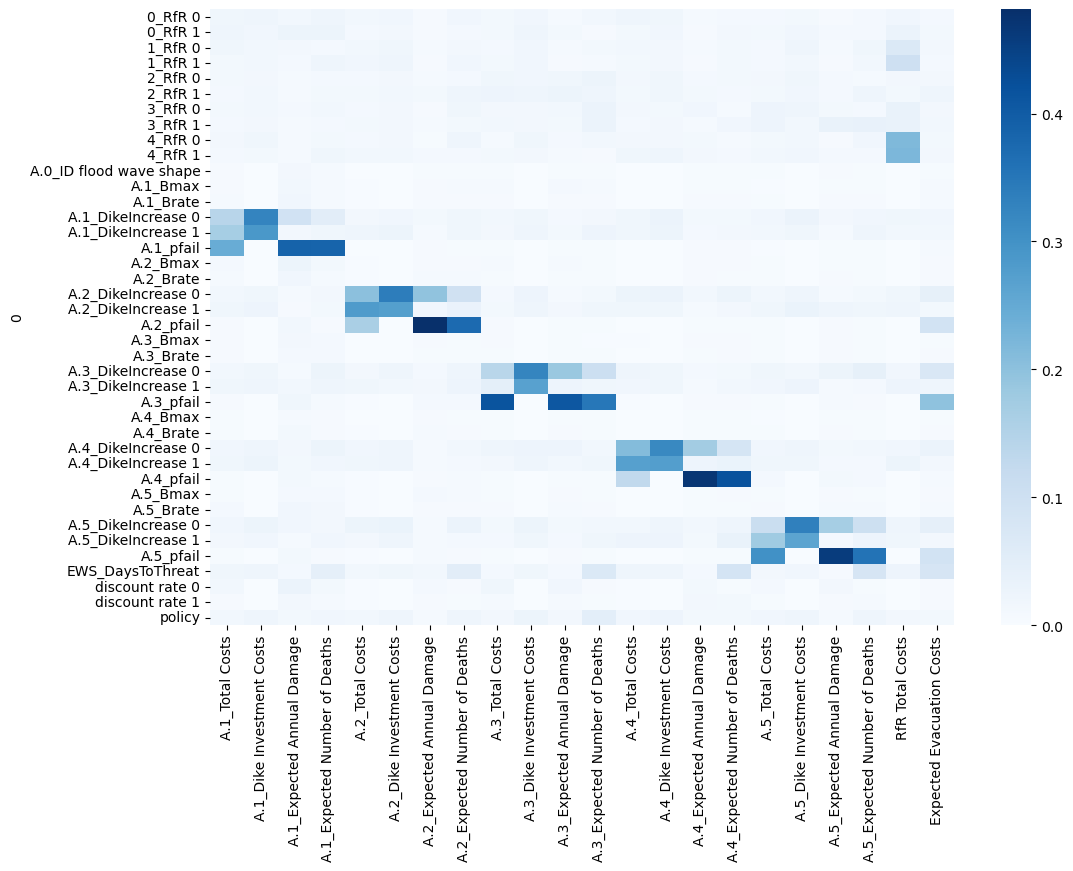

In [34]:
scores = feature_scoring.get_feature_scores_all(experiments, outcomes, mode=RuleInductionType.REGRESSION)
plt.figure(figsize=(12, 8))
ax = sns.heatmap(scores, annot=False, cmap = "Blues", fmt=".2f")
plt.show()

[MainProcess/INFO] results loaded successfully from /Users/racheldelvin/Desktop/epa141a-flood-policy-optimization-overijssel/final assignment/results/GSA_PF6_S200_P50_.tar.gz


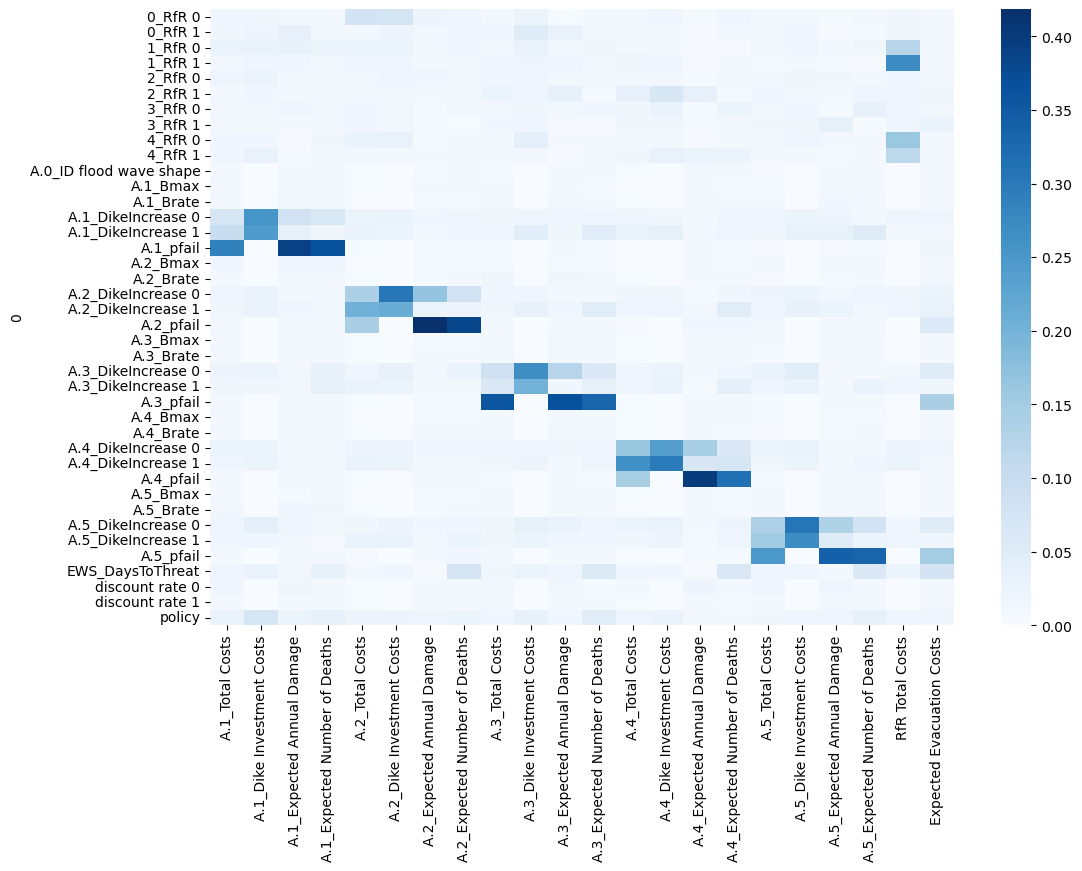

In [35]:
results1 = load_results('results/GSA_PF6_S200_P50_.tar.gz')

experiments1, outcomes1 = results1
scores1 = feature_scoring.get_feature_scores_all(experiments1, outcomes1, mode=RuleInductionType.REGRESSION)
plt.figure(figsize=(12, 8))
ax = sns.heatmap(scores1, annot=False, cmap = "Blues", fmt=".2f")
plt.show()

In [39]:
outcomes

{'A.1_Total Costs': array([4.7847948e+07, 4.7847948e+07, 4.7847948e+07, ..., 1.5483484e+08,
        1.5483484e+08, 1.5483484e+08]),
 'A.1_Dike Investment Costs': array([4.7847948e+07, 4.7847948e+07, 4.7847948e+07, ..., 1.5483484e+08,
        1.5483484e+08, 1.5483484e+08]),
 'A.1_Expected Annual Damage': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.1_Expected Number of Deaths': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.2_Total Costs': array([9.98859095e+07, 1.03891802e+08, 9.98859095e+07, ...,
        1.33844205e+08, 1.33844205e+08, 1.33844205e+08]),
 'A.2_Dike Investment Costs': array([9.98859095e+07, 9.98859095e+07, 9.98859095e+07, ...,
        1.33844205e+08, 1.33844205e+08, 1.33844205e+08]),
 'A.2_Expected Annual Damage': array([      0.        , 4005892.42734186,       0.        , ...,
              0.        ,       0.        ,       0.        ]),
 'A.2_Expected Number of Deaths': array([0.        , 0.00473563, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 'A.3_Tota

In [102]:
var_interest = 'A.4_Expected Number of Deaths'
threshold = np.percentile(outcomes[var_interest], 95)

y = outcomes[var_interest] >= threshold

In [103]:
y

array([False, False, False, ..., False, False, False])

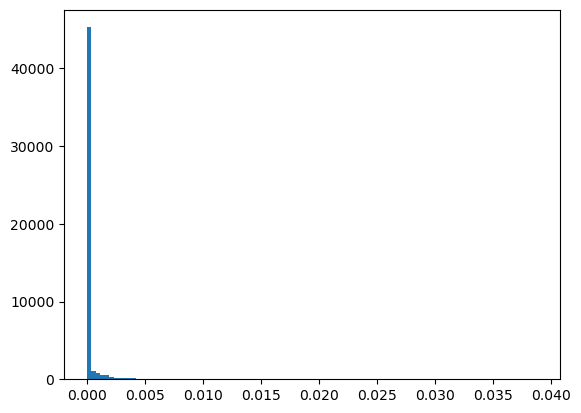

0.0 0.038826019449107
[0.         0.         0.         0.         0.         0.00031558
 0.03882602]


In [104]:
import matplotlib.pyplot as plt
plt.hist(outcomes[var_interest], bins=100)
plt.show()
print(np.min(outcomes[var_interest]), np.max(outcomes[var_interest]))
print(np.percentile(outcomes[var_interest], [0, 5, 10, 20, 50, 90, 100]))

In [105]:
print(np.sum(y))
print(np.unique(y, return_counts=True))

2500
(array([False,  True]), array([47500,  2500]))


In [70]:
x = experiments.drop(columns='policy')

In [56]:
x

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_Brate,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail,discount rate 0,discount rate 1,scenario,policy,model
0,17,163.492528,1.0,0.112280,295.928502,1.0,0.664716,112.850429,10.0,0.249037,...,1.0,0.364480,106.591540,1.5,0.524725,1.5,4.5,100,0,dikesnet
1,109,161.331147,1.5,0.557056,287.927055,1.5,0.305245,67.755957,1.0,0.493271,...,1.0,0.585453,251.611701,1.0,0.430767,2.5,1.5,101,0,dikesnet
2,21,283.754940,1.0,0.585620,111.088305,1.0,0.404485,70.092344,1.0,0.227254,...,1.0,0.970132,76.712001,1.5,0.340304,3.5,3.5,102,0,dikesnet
3,22,234.402140,10.0,0.052935,324.883833,1.5,0.849773,94.132989,1.5,0.764959,...,1.5,0.259079,108.351400,1.5,0.947650,1.5,4.5,103,0,dikesnet
4,63,311.595648,10.0,0.541642,231.788804,1.5,0.345724,81.935305,10.0,0.939125,...,10.0,0.821012,138.553913,1.5,0.062765,2.5,4.5,104,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,11,33.092413,1.0,0.139144,90.596702,10.0,0.312237,306.380340,1.5,0.564625,...,1.5,0.230004,122.214241,10.0,0.328436,3.5,2.5,595,99,dikesnet
49996,16,111.720887,10.0,0.686123,222.355408,1.5,0.176305,65.900668,10.0,0.520273,...,10.0,0.841140,227.164685,1.5,0.212565,3.5,3.5,596,99,dikesnet
49997,108,327.123910,10.0,0.913894,192.274266,1.0,0.223449,147.180795,10.0,0.781790,...,1.5,0.382323,219.835706,1.0,0.445010,1.5,3.5,597,99,dikesnet
49998,56,113.527561,1.5,0.306634,244.538331,1.0,0.115638,153.401123,1.5,0.021029,...,1.0,0.012801,210.173623,10.0,0.276789,3.5,2.5,598,99,dikesnet


In [44]:
outcomes_df = pd.DataFrame(outcomes)

In [46]:
experiments.head()

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.5_DikeIncrease 0,A.5_DikeIncrease 1,EWS_DaysToThreat,scenario,policy,model
0,17,163.492528,1.0,0.112280,295.928502,1.0,0.664716,112.850429,10.0,0.249037,...,2,10,9,1,8,5,0,100,0,dikesnet
1,109,161.331147,1.5,0.557056,287.927055,1.5,0.305245,67.755957,1.0,0.493271,...,2,10,9,1,8,5,0,101,0,dikesnet
2,21,283.754940,1.0,0.585620,111.088305,1.0,0.404485,70.092344,1.0,0.227254,...,2,10,9,1,8,5,0,102,0,dikesnet
3,22,234.402140,10.0,0.052935,324.883833,1.5,0.849773,94.132989,1.5,0.764959,...,2,10,9,1,8,5,0,103,0,dikesnet
4,63,311.595648,10.0,0.541642,231.788804,1.5,0.345724,81.935305,10.0,0.939125,...,2,10,9,1,8,5,0,104,0,dikesnet


In [45]:
outcomes_df.head()

,A.1_Total Costs,A.1_Dike Investment Costs,A.1_Expected Annual Damage,A.1_Expected Number of Deaths,A.2_Total Costs,A.2_Dike Investment Costs,A.2_Expected Annual Damage,A.2_Expected Number of Deaths,A.3_Total Costs,A.3_Dike Investment Costs,...,A.4_Total Costs,A.4_Dike Investment Costs,A.4_Expected Annual Damage,A.4_Expected Number of Deaths,A.5_Total Costs,A.5_Dike Investment Costs,A.5_Expected Annual Damage,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,4.784795e+07,4.784795e+07,0.0,0.0,9.988591e+07,9.988591e+07,0.000000e+00,0.000000,6.945620e+07,6.945620e+07,...,2.669677e+07,2.669677e+07,0.0,0.0,9.645122e+07,9.645122e+07,0.0,0.0,874300000.0,0.0
1,4.784795e+07,4.784795e+07,0.0,0.0,1.038918e+08,9.988591e+07,4.005892e+06,0.004736,6.945620e+07,6.945620e+07,...,2.669677e+07,2.669677e+07,0.0,0.0,9.645122e+07,9.645122e+07,0.0,0.0,874300000.0,0.0
2,4.784795e+07,4.784795e+07,0.0,0.0,9.988591e+07,9.988591e+07,0.000000e+00,0.000000,6.945620e+07,6.945620e+07,...,2.669677e+07,2.669677e+07,0.0,0.0,9.645122e+07,9.645122e+07,0.0,0.0,874300000.0,0.0
3,4.784795e+07,4.784795e+07,0.0,0.0,9.988591e+07,9.988591e+07,0.000000e+00,0.000000,6.945620e+07,6.945620e+07,...,2.669677e+07,2.669677e+07,0.0,0.0,9.645122e+07,9.645122e+07,0.0,0.0,874300000.0,0.0
4,4.784795e+07,4.784795e+07,0.0,0.0,1.038957e+08,9.988591e+07,4.009765e+06,0.004745,6.945620e+07,6.945620e+07,...,2.669677e+07,2.669677e+07,0.0,0.0,9.645122e+07,9.645122e+07,0.0,0.0,874300000.0,0.0


In [19]:
outcomes_df.describe()

,A.1_Total Costs,A.1_Dike Investment Costs,A.1_Expected Annual Damage,A.1_Expected Number of Deaths,A.2_Total Costs,A.2_Dike Investment Costs,A.2_Expected Annual Damage,A.2_Expected Number of Deaths,A.3_Total Costs,A.3_Dike Investment Costs,...,A.4_Total Costs,A.4_Dike Investment Costs,A.4_Expected Annual Damage,A.4_Expected Number of Deaths,A.5_Total Costs,A.5_Dike Investment Costs,A.5_Expected Annual Damage,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
count,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,5.000000e+04,5.000000e+04,...,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,5.000000e+04,50000.000000
mean,1.265378e+08,1.193592e+08,7.178563e+06,0.002155,1.376830e+08,1.298470e+08,7.836006e+06,0.002517,7.645787e+07,6.158158e+07,...,2.613099e+07,2.470842e+07,1.422570e+06,0.000282,8.734686e+07,7.893841e+07,8.408450e+06,0.003913,7.104000e+08,1718.298113
std,6.790770e+07,4.318209e+07,5.705950e+07,0.021693,4.778727e+07,4.651040e+07,2.973559e+07,0.014210,6.363988e+07,2.044790e+07,...,9.857111e+06,9.558136e+06,5.668389e+06,0.001540,3.546788e+07,2.578068e+07,3.169307e+07,0.020047,2.528747e+08,4405.201150
min,3.269490e+07,3.269490e+07,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,6.320800e+06,6.320800e+06,0.000000e+00,0.000000,2.503721e+07,2.503721e+07,0.000000e+00,0.000000,2.365000e+08,0.000000
25%,8.526436e+07,8.524602e+07,0.000000e+00,0.000000,1.046517e+08,9.952540e+07,0.000000e+00,0.000000,5.281117e+07,5.082342e+07,...,1.936463e+07,1.805001e+07,0.000000e+00,0.000000,6.629411e+07,6.003947e+07,0.000000e+00,0.000000,5.228750e+08,0.000000
50%,1.267450e+08,1.266825e+08,0.000000e+00,0.000000,1.373007e+08,1.305288e+08,0.000000e+00,0.000000,6.483599e+07,5.990344e+07,...,2.595775e+07,2.430330e+07,0.000000e+00,0.000000,8.699192e+07,8.253046e+07,0.000000e+00,0.000000,7.266000e+08,106.450561
75%,1.543459e+08,1.510775e+08,0.000000e+00,0.000000,1.658649e+08,1.579233e+08,0.000000e+00,0.000000,7.957623e+07,7.496467e+07,...,3.257696e+07,3.126267e+07,0.000000e+00,0.000000,1.001055e+08,9.653040e+07,0.000000e+00,0.000000,8.762000e+08,1137.113255
max,1.196470e+09,2.281947e+08,1.111224e+09,0.668814,4.268123e+08,2.387952e+08,3.528180e+08,0.342151,8.037700e+08,1.060868e+08,...,9.385873e+07,4.890894e+07,8.278996e+07,0.038826,5.550711e+08,1.395855e+08,5.041411e+08,0.521466,1.274800e+09,62654.146571


In [14]:
x.describe()

,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.2_Bmax,A.2_pfail,A.3_Bmax,A.3_pfail,A.4_Bmax,A.4_pfail,A.5_Bmax,A.5_pfail
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,66.012000,189.996628,0.499975,189.988231,0.500041,190.001063,0.500008,190.007276,0.500009,190.001778,0.500037
std,38.388974,92.372469,0.288683,92.371897,0.288697,92.388144,0.288706,92.382888,0.288674,92.374938,0.288686
min,0.000000,30.056246,0.000048,30.295516,0.000334,30.617023,0.000232,30.582525,0.000668,30.628862,0.000594
25%,33.000000,110.431706,0.250420,109.957056,0.250985,109.984495,0.250045,109.938814,0.249654,110.153571,0.250130
50%,66.000000,189.761074,0.500396,189.784490,0.500176,190.066640,0.500618,189.945543,0.500049,190.038357,0.500475
75%,99.000000,269.860743,0.749285,269.904298,0.750038,269.878638,0.748634,269.987174,0.750101,269.721307,0.748768
max,132.000000,349.652689,0.999482,349.834588,0.999554,349.369073,0.999436,349.924527,0.998084,349.520989,0.998503


In [57]:
experiments.head()

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.5_DikeIncrease 0,A.5_DikeIncrease 1,EWS_DaysToThreat,scenario,policy,model
0,17,163.492528,1.0,0.112280,295.928502,1.0,0.664716,112.850429,10.0,0.249037,...,2,10,9,1,8,5,0,100,0,dikesnet
1,109,161.331147,1.5,0.557056,287.927055,1.5,0.305245,67.755957,1.0,0.493271,...,2,10,9,1,8,5,0,101,0,dikesnet
2,21,283.754940,1.0,0.585620,111.088305,1.0,0.404485,70.092344,1.0,0.227254,...,2,10,9,1,8,5,0,102,0,dikesnet
3,22,234.402140,10.0,0.052935,324.883833,1.5,0.849773,94.132989,1.5,0.764959,...,2,10,9,1,8,5,0,103,0,dikesnet
4,63,311.595648,10.0,0.541642,231.788804,1.5,0.345724,81.935305,10.0,0.939125,...,2,10,9,1,8,5,0,104,0,dikesnet


In [58]:
experiments.columns

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       '0_RfR 0', '0_RfR 1', '1_RfR 0', '1_RfR 1', '2_RfR 0', '2_RfR 1',
       '3_RfR 0', '3_RfR 1', '4_RfR 0', '4_RfR 1', 'A.1_DikeIncrease 0',
       'A.1_DikeIncrease 1', 'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.4_DikeIncrease 0',
       'A.4_DikeIncrease 1', 'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1',
       'EWS_DaysToThreat', 'scenario', 'policy', 'model'],
      dtype='object')

In [59]:
x.columns

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'scenario', 'policy', 'model'],
      dtype='object')

In [107]:
from ema_workbench.analysis import prim

ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(x=x, y=y, threshold=0.45, peel_alpha=0.1, mode=RuleInductionType.BINARY)
box_casualties = prim_alg.find_box()

[MainProcess/INFO] column model dropped from analysis because it has only one category
[MainProcess/INFO] 50000 points remaining, containing 2500 cases of interest
/opt/anaconda3/envs/school/lib/python3.12/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
/opt/anaconda3/envs/school/lib/python3.12/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
/opt/anaconda3/envs/school/lib/python3.12/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompati

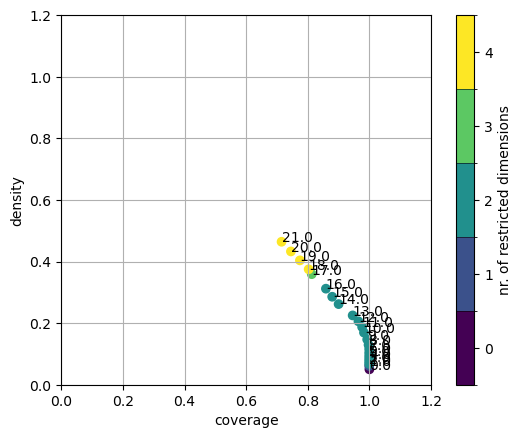

In [108]:
box_casualties.show_tradeoff(annotated=True)
plt.grid(True)
plt.show()

In [109]:
box_casualties.inspect(21)

coverage       0.714800
density        0.464156
id            21.000000
k           1787.000000
mass           0.077000
mean           0.464156
n           3850.000000
res_dim        4.000000
Name: 21, dtype: float64

                      box 21                                    
                         min        max  qp value       qp value
A.4_pfail           0.000668   0.220253       NaN   0.000000e+00
A.4_DikeIncrease 0  0.000000   4.000000       NaN  1.680499e-237
A.5_DikeIncrease 0  0.000000   8.000000       NaN   3.597197e-15
A.5_DikeIncrease 1  1.000000  10.000000  0.009466            NaN



[None]

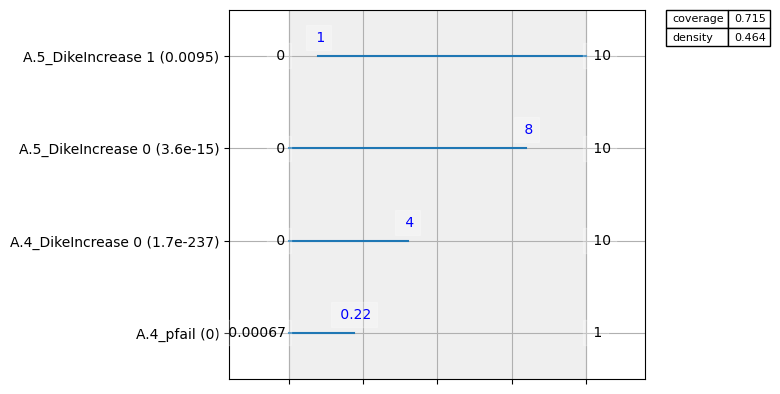

In [110]:
box_casualties.inspect(21, style='graph')
plt.grid(True)
plt.show()

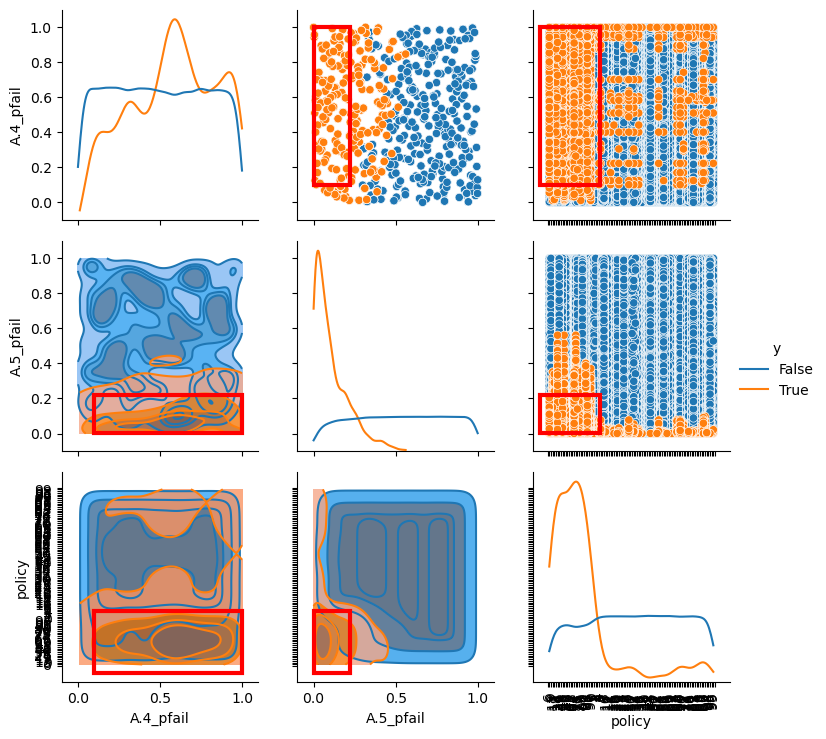

In [32]:
box_casualties.select(89)
fig = box_casualties.show_pairs_scatter()
plt.show()

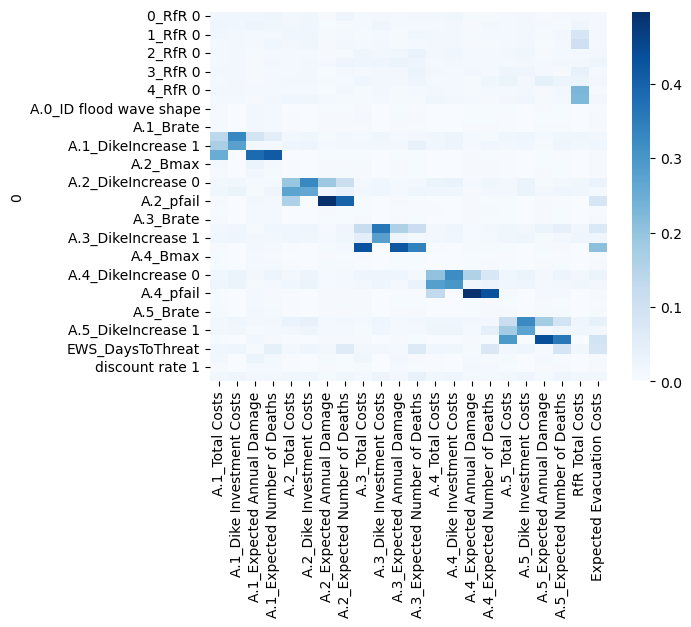

In [ ]:
scores = feature_scoring.get_feature_scores_all(experiments, outcomes, mode=RuleInductionType.REGRESSION)
plt.figure(figsize=(12, 8))
ax = sns.heatmap(scores, annot=False, cmap = "Blues", fmt=".2f")
plt.show()

In [3]:
ema_logging.log_to_stderr(ema_logging.INFO)

prob_formulation = 6
model, steps = get_model_for_problem_formulation(prob_formulation)
uncertainties = model.uncertainties
levers = model.levers

n_scenario = 64
n_policy = 64

with MultiprocessingEvaluator(model, n_processes=4) as evaluator:
    results = evaluator.perform_experiments(scenarios=n_scenario,
                                            policies=n_policy,
                                            lever_sampling=Samplers.SOBOL
                                            )

save_results(results, 'results/GSA_PF{}_S{}_P{}_.tar.gz'.format(prob_formulation,n_scenario,n_policy))

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 64 scenarios * 2816 policies * 1 model(s) = 180224 experiments
100%|████████████████████████████████| 180224/180224 [2:45:32<00:00, 18.15it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to /Users/racheldelvin/Desktop/epa141a-flood-policy-optimization-overijssel/final assignment/results/GSA_PF6_S64_P64_.tar.gz


In [8]:
experiments_sobol, outcomes_sobol = results

In [ ]:
outcome_var = 'Expected Number of Deaths'

Si = sobol.analyze(problem, outcomes_sobol[outcome_var], print_to_console=True, calc_second_order=True)
# scenario = 20, policy = 10

/opt/anaconda3/envs/school/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                          ST   ST_conf
0_RfR 0             0.493835  0.255479
0_RfR 1             0.504046  0.734394
1_RfR 0             1.013973  0.058404
1_RfR 1             0.194533  0.187033
2_RfR 0             0.333816  0.422281
2_RfR 1             0.492636  0.692189
3_RfR 0             0.798014  1.218864
3_RfR 1             0.151937  0.153140
4_RfR 0             0.322628  0.307505
4_RfR 1             0.474487  0.723977
A.1_DikeIncrease 0  0.949891  1.093464
A.1_DikeIncrease 1  0.184055  0.202550
A.2_DikeIncrease 0  0.379633  0.357087
A.2_DikeIncrease 1  0.370414  0.537972
A.3_DikeIncrease 0  0.822280  1.026829
A.3_DikeIncrease 1  0.162097  0.182372
A.4_DikeIncrease 0  0.310132  0.263305
A.4_DikeIncrease 1  0.344124  0.532434
A.5_DikeIncrease 0  0.608408  0.724683
A.5_DikeIncrease 1  0.018286  0.024424
EWS_DaysToThreat    0.484713  0.246986
                          S1   S1_conf
0_RfR 0             0.881835  0.204356
0_RfR 1             0.264760  0.325086
1_RfR 0             1.782

/opt/anaconda3/envs/school/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


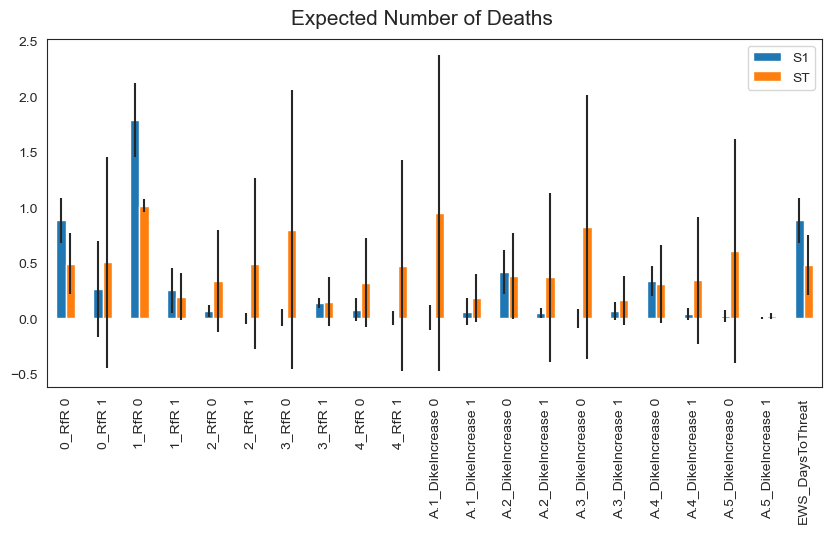

In [ ]:
# Prepare Sobol Variables
problem = get_SALib_problem(levers)
outcome_var = 'Expected Number of Deaths'
Si = sobol.analyze(problem, outcomes_sobol[outcome_var], print_to_console=False)

# Process Dataframe: Filter S1+ST
Si_filter_s1_st = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter_s1_st, index= problem['names'])

# Visualize Sobol indices
sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.suptitle(outcome_var, fontsize=15, y=0.93)
fig.set_size_inches(10,6)
fig.subplots_adjust(bottom=0.3)

plt.show()

In [14]:
import itertools

def flatten_dict_arrays(dictionary):
    flattened_dict = {}

    for key, value in dictionary.items():
        flattened_array = []
        for row in value:
            flattened_array.extend(row)
        flattened_dict[key] = flattened_array

    return flattened_dict

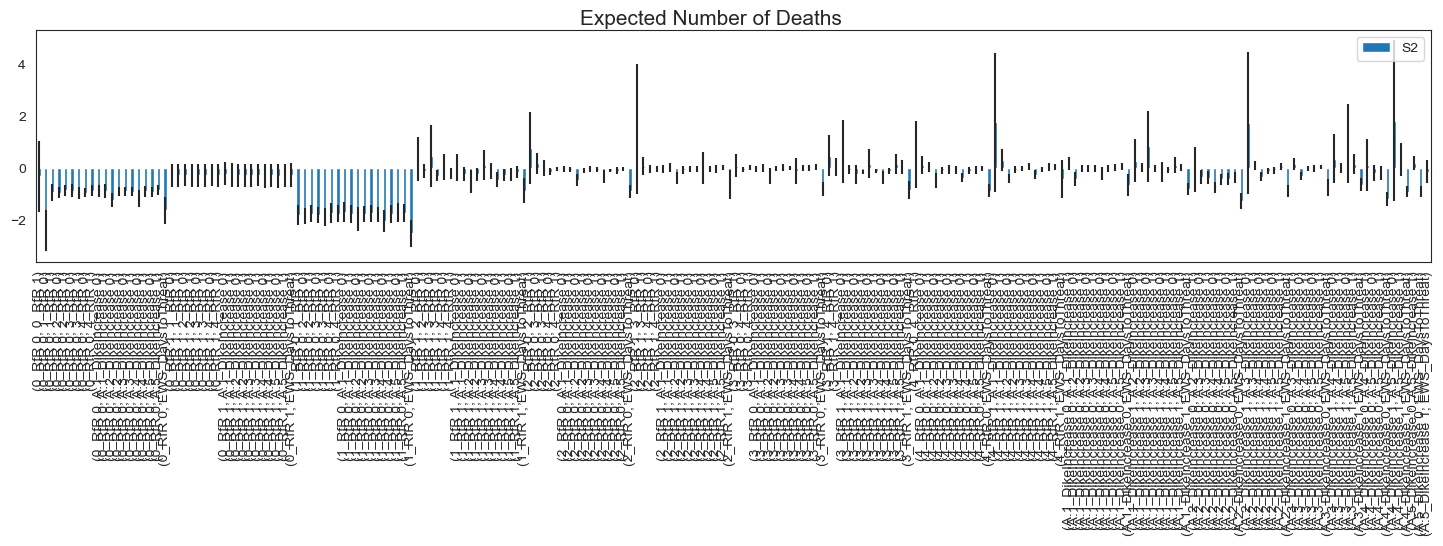

In [12]:
Si_filter_s2 = {k:Si[k] for k in ['S2','S2_conf']}
S2_df = pd.DataFrame(flatten_dict_arrays(Si_filter_s2), index= list(itertools.product(problem['names'], repeat=2)))

# Visualize Sobol indices
sns.set_style('white')
fig, ax = plt.subplots(1)

indices, err = S2_df[["S2"]].dropna(), S2_df[['S2_conf']].dropna()

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.suptitle(outcome_var, fontsize=15, y=0.93)
fig.set_size_inches(18,4)
fig.subplots_adjust(bottom=0.3)
plt.show()

In [4]:
results_sobol = load_results('results/GSA_PF6_S64_P64_.tar.gz')

[MainProcess/INFO] results loaded successfully from /Users/racheldelvin/Desktop/epa141a-flood-policy-optimization-overijssel/final assignment/results/GSA_PF6_S64_P64_.tar.gz


In [ ]:
experiments_s, outcomes_s = results_sobol

In [6]:
outcomes_s

{'A.1_Total Costs': array([1.42489097e+08, 1.42489097e+08, 1.42489097e+08, ...,
        1.45377610e+08, 1.45377610e+08, 1.45377610e+08]),
 'A.1_Dike Investment Costs': array([1.42489097e+08, 1.42489097e+08, 1.42489097e+08, ...,
        1.45377610e+08, 1.45377610e+08, 1.45377610e+08]),
 'A.1_Expected Annual Damage': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.1_Expected Number of Deaths': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.2_Total Costs': array([1.06702203e+08, 1.04695350e+08, 1.00247523e+08, ...,
        1.12940033e+08, 1.06860238e+08, 1.52438961e+08]),
 'A.2_Dike Investment Costs': array([9.96853189e+07, 9.96853189e+07, 9.96853189e+07, ...,
        1.06860238e+08, 1.06860238e+08, 1.06860238e+08]),
 'A.2_Expected Annual Damage': array([ 7016883.58649995,  5010030.71708822,   562204.1644772 , ...,
         6079794.41073918,        0.        , 45578722.88269018]),
 'A.2_Expected Number of Deaths': array([0.00708154, 0.00708458, 0.00057927, ..., 0.00090328, 0.        ,
        0.0083

In [7]:
for key, value in outcomes_s.items():
    print(f"{key}: {value.shape}")

A.1_Total Costs: (180224,)
A.1_Dike Investment Costs: (180224,)
A.1_Expected Annual Damage: (180224,)
A.1_Expected Number of Deaths: (180224,)
A.2_Total Costs: (180224,)
A.2_Dike Investment Costs: (180224,)
A.2_Expected Annual Damage: (180224,)
A.2_Expected Number of Deaths: (180224,)
A.3_Total Costs: (180224,)
A.3_Dike Investment Costs: (180224,)
A.3_Expected Annual Damage: (180224,)
A.3_Expected Number of Deaths: (180224,)
A.4_Total Costs: (180224,)
A.4_Dike Investment Costs: (180224,)
A.4_Expected Annual Damage: (180224,)
A.4_Expected Number of Deaths: (180224,)
A.5_Total Costs: (180224,)
A.5_Dike Investment Costs: (180224,)
A.5_Expected Annual Damage: (180224,)
A.5_Expected Number of Deaths: (180224,)
RfR Total Costs: (180224,)
Expected Evacuation Costs: (180224,)


In [8]:
experiments_s.shape

(180224, 42)

In [9]:
outcome_var = 'A.5_Expected Annual Damage'
problem = get_SALib_problem(levers)

Si = sobol.analyze(problem, outcomes_s[outcome_var], print_to_console=True, calc_second_order=True)

/opt/anaconda3/envs/school/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                          ST   ST_conf
0_RfR 0             0.572586  0.148897
0_RfR 1             0.690029  0.148744
1_RfR 0             0.816945  0.202855
1_RfR 1             0.237889  0.053662
2_RfR 0             0.699092  0.203368
2_RfR 1             0.743116  0.114014
3_RfR 0             0.960827  0.247243
3_RfR 1             0.210008  0.049636
4_RfR 0             0.851998  0.221726
4_RfR 1             0.753261  0.166096
A.1_DikeIncrease 0  0.646086  0.152622
A.1_DikeIncrease 1  0.188193  0.041915
A.2_DikeIncrease 0  0.673165  0.171632
A.2_DikeIncrease 1  0.702051  0.149482
A.3_DikeIncrease 0  0.720914  0.182589
A.3_DikeIncrease 1  0.190080  0.040104
A.4_DikeIncrease 0  0.699480  0.185106
A.4_DikeIncrease 1  0.785173  0.112917
A.5_DikeIncrease 0  0.973316  0.236300
A.5_DikeIncrease 1  0.238703  0.031712
EWS_DaysToThreat    0.794859  0.207675
                          S1   S1_conf
0_RfR 0             0.159179  0.055195
0_RfR 1             0.131305  0.061982
1_RfR 0             0.263

In [159]:
Si

{'S1': array([ 0.08927735, -0.01515443,  0.02258132,  0.19226912,  0.09323095,
         0.03947035,  0.03605417,  0.06179647,  0.09502688,  0.10567329,
        -0.04632483, -0.03231863,  0.05641553, -0.03441494,  0.08136915,
        -0.05061423, -0.07119124, -0.01353697, -0.03403527,  0.00747895,
         0.12677001]),
 'S1_conf': array([0.17954403, 0.16147154, 0.10351309, 0.18675129, 0.21074532,
        0.12207595, 0.11110249, 0.16087194, 0.15632531, 0.14705552,
        0.08890181, 0.1381297 , 0.17666849, 0.11707902, 0.16590056,
        0.10341036, 0.10635557, 0.15643055, 0.12650067, 0.15786004,
        0.18000845]),
 'ST': array([0.86828923, 0.9204698 , 0.72946876, 0.65568437, 0.92420813,
        0.86511911, 0.71834278, 0.80242688, 0.77985479, 0.90156986,
        0.62258373, 0.84240608, 0.87276595, 0.80601572, 0.74648608,
        0.81380434, 0.79873338, 0.84804599, 0.68968864, 0.85835851,
        0.80019748]),
 'ST_conf': array([0.19460859, 0.18806298, 0.17576723, 0.1449419 , 0.17698

In [10]:
# Create DataFrame for S1, S1_conf, ST, ST_conf
Si_df = pd.DataFrame({
    'S1': Si['S1'],
    'S1_conf': Si['S1_conf'],
    'ST': Si['ST'],
    'ST_conf': Si['ST_conf']
}, index=problem['names'])

Si_df

,S1,S1_conf,ST,ST_conf
0_RfR 0,0.159179,0.055195,0.572586,0.148897
0_RfR 1,0.131305,0.061982,0.690029,0.148744
1_RfR 0,0.263539,0.059641,0.816945,0.202855
1_RfR 1,0.151278,0.039111,0.237889,0.053662
2_RfR 0,0.054039,0.040783,0.699092,0.203368
2_RfR 1,0.873125,0.187732,0.743116,0.114014
3_RfR 0,0.208521,0.078785,0.960827,0.247243
3_RfR 1,-0.027628,0.033552,0.210008,0.049636
4_RfR 0,0.101408,0.047477,0.851998,0.221726
4_RfR 1,-0.042811,0.036087,0.753261,0.166096


In [12]:
import itertools

# Create MultiIndex for all pairs
S2_pairs = list(itertools.product(problem['names'], repeat=2))

# Flatten S2 and S2_conf arrays and create DataFrame
S2_df = pd.DataFrame({
    'S2': Si['S2'].flatten(),
    'S2_conf': Si['S2_conf'].flatten()
}, index=pd.MultiIndex.from_tuples(S2_pairs, names=['Var1', 'Var2']))

S2_df

S2   S2_conf
Var1             Var2                                  
0_RfR 0          0_RfR 0                  NaN       NaN
                 0_RfR 1            -0.129204  0.056875
                 1_RfR 0             0.057498  0.027811
                 1_RfR 1            -0.373612  0.107938
                 2_RfR 0             0.038124  0.035318
...                                       ...       ...
EWS_DaysToThreat A.4_DikeIncrease 0       NaN       NaN
                 A.4_DikeIncrease 1       NaN       NaN
                 A.5_DikeIncrease 0       NaN       NaN
                 A.5_DikeIncrease 1       NaN       NaN
                 EWS_DaysToThreat         NaN       NaN

[441 rows x 2 columns]

In [162]:
S2_df.to_csv('results/sobol_s2.csv')

In [163]:
S2_df.describe()

,S2,S2_conf
count,210.000000,210.000000
mean,-0.058823,0.212193
std,0.121644,0.043982
min,-0.379234,0.113684
25%,-0.145640,0.181493
50%,-0.066511,0.211349
75%,0.030305,0.239646
max,0.221549,0.330156


/opt/anaconda3/envs/school/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


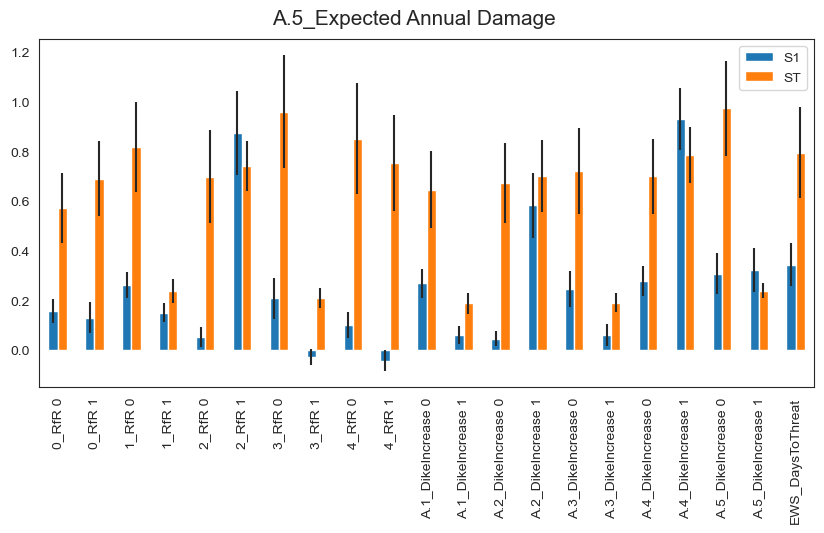

In [11]:
# Prepare Sobol Variables
problem = get_SALib_problem(levers)
outcome_var = 'A.5_Expected Annual Damage'
Si = sobol.analyze(problem, outcomes_s[outcome_var], print_to_console=False)

# Process Dataframe: Filter S1+ST
Si_filter_s1_st = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter_s1_st, index= problem['names'])

# Visualize Sobol indices
sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.suptitle(outcome_var, fontsize=15, y=0.93)
fig.set_size_inches(10,6)
fig.subplots_adjust(bottom=0.3)

plt.show()

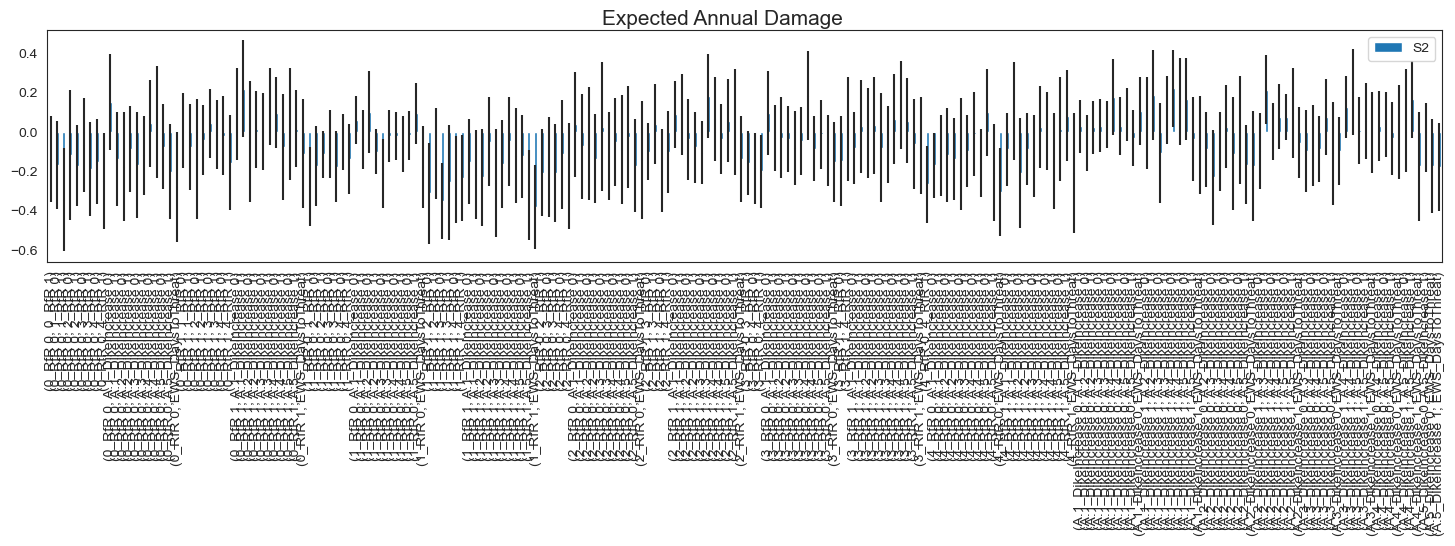

In [144]:
Si_filter_s2 = {k:Si[k] for k in ['S2','S2_conf']}
S2_df = pd.DataFrame(flatten_dict_arrays(Si_filter_s2), index= list(itertools.product(problem['names'], repeat=2)))

# Visualize Sobol indices
sns.set_style('white')
fig, ax = plt.subplots(1)

indices, err = S2_df[["S2"]].dropna(), S2_df[['S2_conf']].dropna()

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.suptitle(outcome_var, fontsize=15, y=0.93)
fig.set_size_inches(18,4)
fig.subplots_adjust(bottom=0.3)
plt.show()

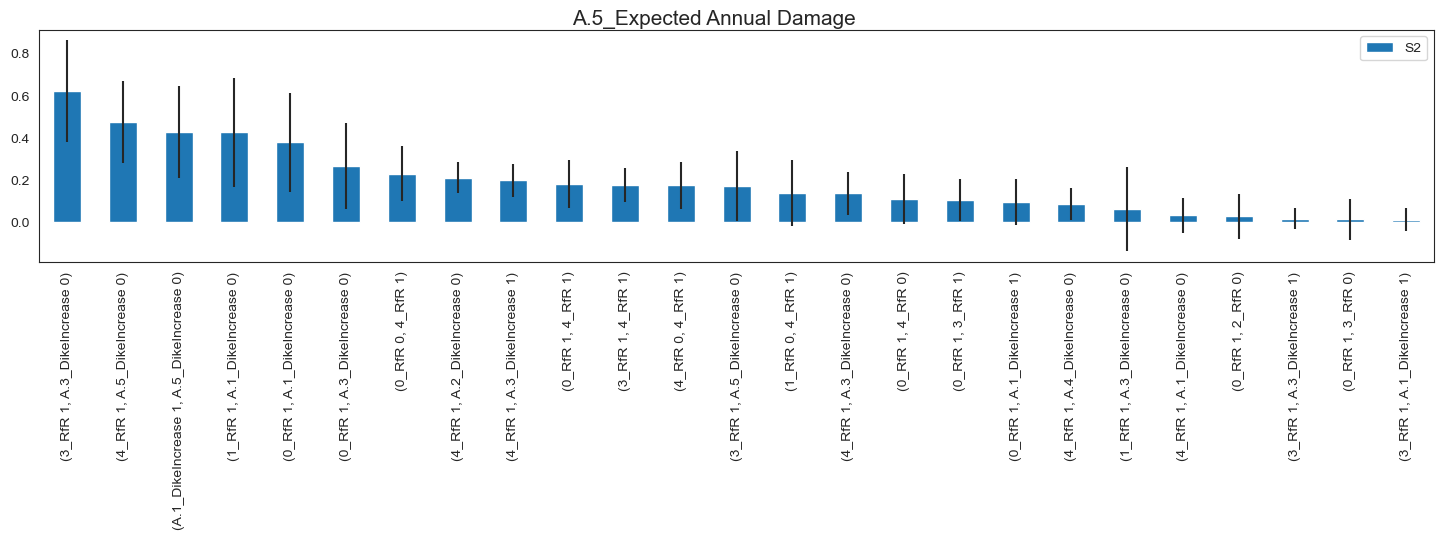

In [14]:
Si_filter_s2 = {k: Si[k] for k in ['S2', 'S2_conf']}
S2_df = pd.DataFrame(flatten_dict_arrays(Si_filter_s2), index=list(itertools.product(problem['names'], repeat=2)))

# Filter to only show rows where the mean S2 is positive and sort ascending
S2_df_positive = S2_df[S2_df['S2'] > 0].sort_values(by='S2', ascending=False)

# Visualize Sobol indices (only positive mean S2, ascending order)
sns.set_style('white')
fig, ax = plt.subplots(1)

indices, err = S2_df_positive[["S2"]], S2_df_positive[['S2_conf']]

indices.plot.bar(yerr=err.values.T, ax=ax)
fig.suptitle(outcome_var, fontsize=15, y=0.93)
fig.set_size_inches(18, 4)
fig.subplots_adjust(bottom=0.3)
plt.show()

In [15]:
outcome_var = 'A.4_Expected Annual Damage'
problem = get_SALib_problem(levers)

Si = sobol.analyze(problem, outcomes_s[outcome_var], print_to_console=True, calc_second_order=True)

/opt/anaconda3/envs/school/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                          ST   ST_conf
0_RfR 0             0.434275  0.051065
0_RfR 1             1.030742  0.177053
1_RfR 0             0.432039  0.064087
1_RfR 1             0.608688  0.076753
2_RfR 0             0.545581  0.052753
2_RfR 1             0.582420  0.084891
3_RfR 0             0.899956  0.116130
3_RfR 1             0.454981  0.050322
4_RfR 0             0.451392  0.062631
4_RfR 1             1.393123  0.201401
A.1_DikeIncrease 0  0.695056  0.069231
A.1_DikeIncrease 1  0.438555  0.075145
A.2_DikeIncrease 0  0.465201  0.056140
A.2_DikeIncrease 1  1.031653  0.139731
A.3_DikeIncrease 0  0.942857  0.150199
A.3_DikeIncrease 1  0.725588  0.080961
A.4_DikeIncrease 0  0.331937  0.048291
A.4_DikeIncrease 1  1.437699  0.204233
A.5_DikeIncrease 0  0.867838  0.115377
A.5_DikeIncrease 1  0.619316  0.061847
EWS_DaysToThreat    0.404440  0.048626
                          S1   S1_conf
0_RfR 0            -0.125598  0.081502
0_RfR 1            -0.097315  0.062454
1_RfR 0            -0.234

/opt/anaconda3/envs/school/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


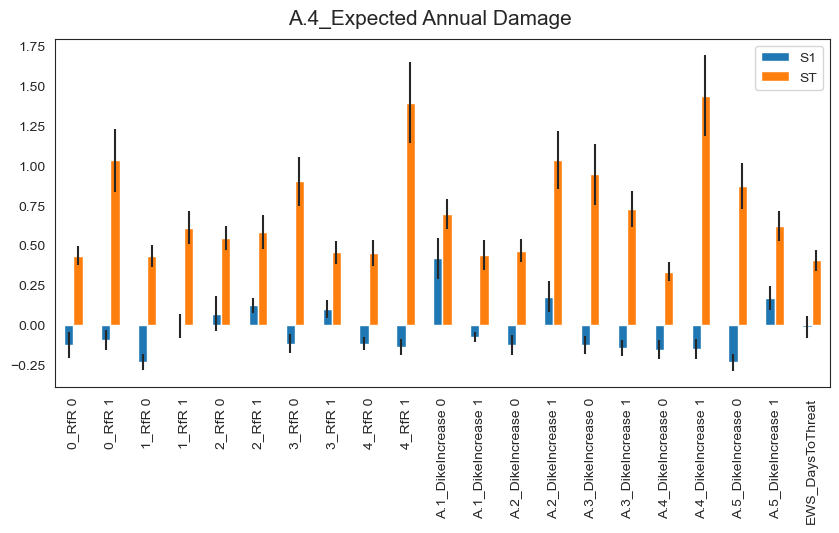

In [16]:
# Prepare Sobol Variables
problem = get_SALib_problem(levers)
outcome_var = 'A.4_Expected Annual Damage'
Si = sobol.analyze(problem, outcomes_s[outcome_var], print_to_console=False)

# Process Dataframe: Filter S1+ST
Si_filter_s1_st = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter_s1_st, index= problem['names'])

# Visualize Sobol indices
sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.suptitle(outcome_var, fontsize=15, y=0.93)
fig.set_size_inches(10,6)
fig.subplots_adjust(bottom=0.3)

plt.show()

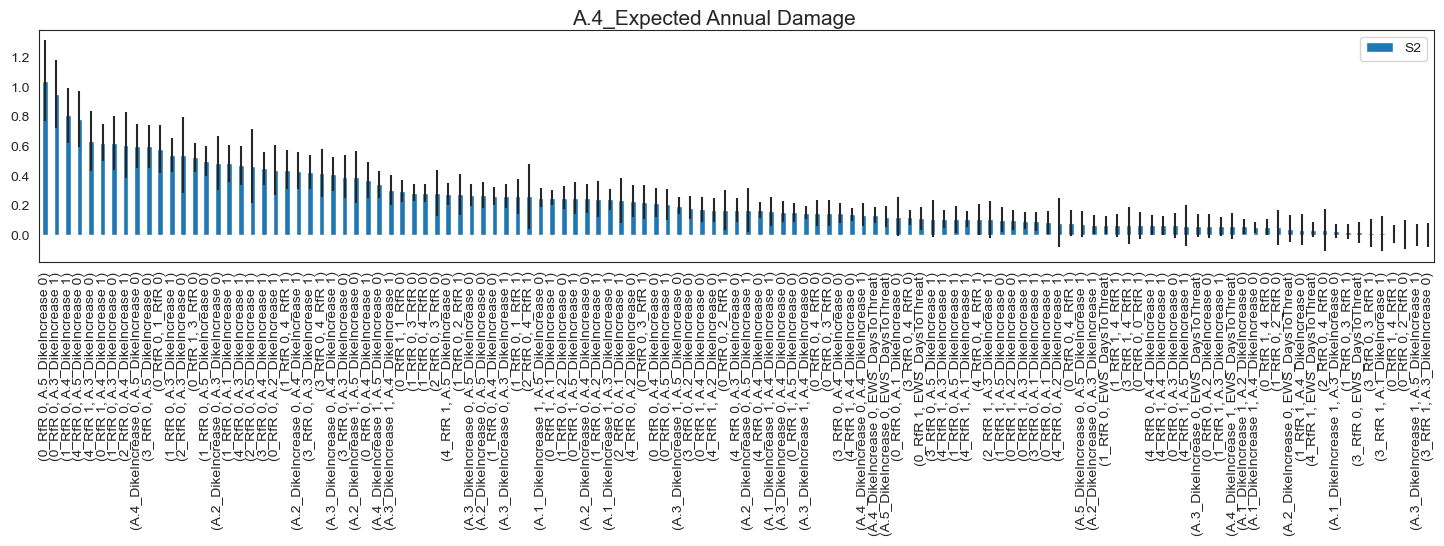

In [17]:
Si_filter_s2 = {k: Si[k] for k in ['S2', 'S2_conf']}
S2_df = pd.DataFrame(flatten_dict_arrays(Si_filter_s2), index=list(itertools.product(problem['names'], repeat=2)))

# Filter to only show rows where the mean S2 is positive and sort ascending
S2_df_positive = S2_df[S2_df['S2'] > 0].sort_values(by='S2', ascending=False)

# Visualize Sobol indices (only positive mean S2, ascending order)
sns.set_style('white')
fig, ax = plt.subplots(1)

indices, err = S2_df_positive[["S2"]], S2_df_positive[['S2_conf']]

indices.plot.bar(yerr=err.values.T, ax=ax)
fig.suptitle(outcome_var, fontsize=15, y=0.93)
fig.set_size_inches(18, 4)
fig.subplots_adjust(bottom=0.3)
plt.show()

In [18]:
outcome_var = 'A.5_Expected Number of Deaths'
problem = get_SALib_problem(levers)

Si = sobol.analyze(problem, outcomes_s[outcome_var], print_to_console=True, calc_second_order=True)

/opt/anaconda3/envs/school/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                          ST   ST_conf
0_RfR 0             0.561607  0.232462
0_RfR 1             0.777876  0.311864
1_RfR 0             0.717957  0.274608
1_RfR 1             0.233675  0.086394
2_RfR 0             0.626351  0.294043
2_RfR 1             0.803108  0.184237
3_RfR 0             0.874605  0.366655
3_RfR 1             0.188463  0.062864
4_RfR 0             0.805323  0.360836
4_RfR 1             0.873636  0.357165
A.1_DikeIncrease 0  0.577796  0.204978
A.1_DikeIncrease 1  0.160928  0.066033
A.2_DikeIncrease 0  0.642122  0.277858
A.2_DikeIncrease 1  0.773153  0.285077
A.3_DikeIncrease 0  0.628414  0.260543
A.3_DikeIncrease 1  0.183617  0.080676
A.4_DikeIncrease 0  0.648163  0.243856
A.4_DikeIncrease 1  0.899725  0.201015
A.5_DikeIncrease 0  0.848835  0.316594
A.5_DikeIncrease 1  0.238447  0.047240
EWS_DaysToThreat    0.790165  0.366756
                          S1   S1_conf
0_RfR 0             0.279746  0.143144
0_RfR 1             0.325722  0.180704
1_RfR 0             0.412

/opt/anaconda3/envs/school/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


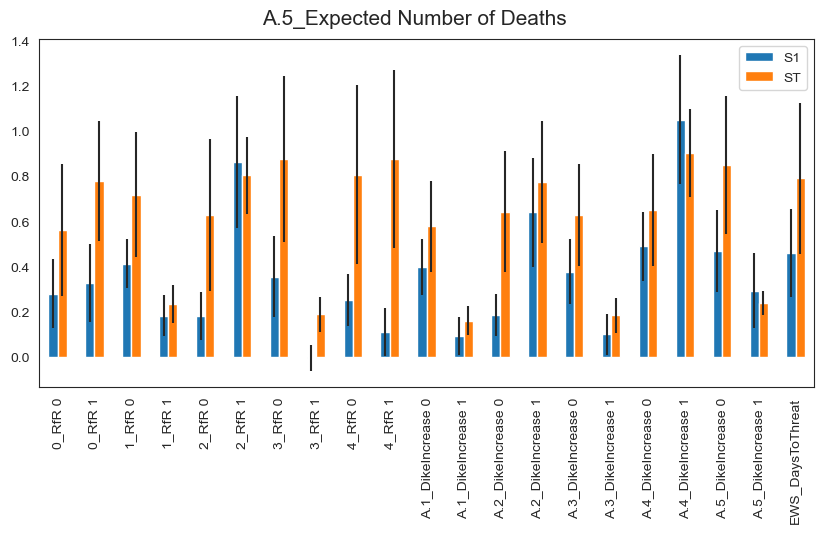

In [19]:
# Prepare Sobol Variables
problem = get_SALib_problem(levers)
outcome_var = 'A.5_Expected Number of Deaths'
Si = sobol.analyze(problem, outcomes_s[outcome_var], print_to_console=False)

# Process Dataframe: Filter S1+ST
Si_filter_s1_st = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter_s1_st, index= problem['names'])

# Visualize Sobol indices
sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.suptitle(outcome_var, fontsize=15, y=0.93)
fig.set_size_inches(10,6)
fig.subplots_adjust(bottom=0.3)

plt.show()

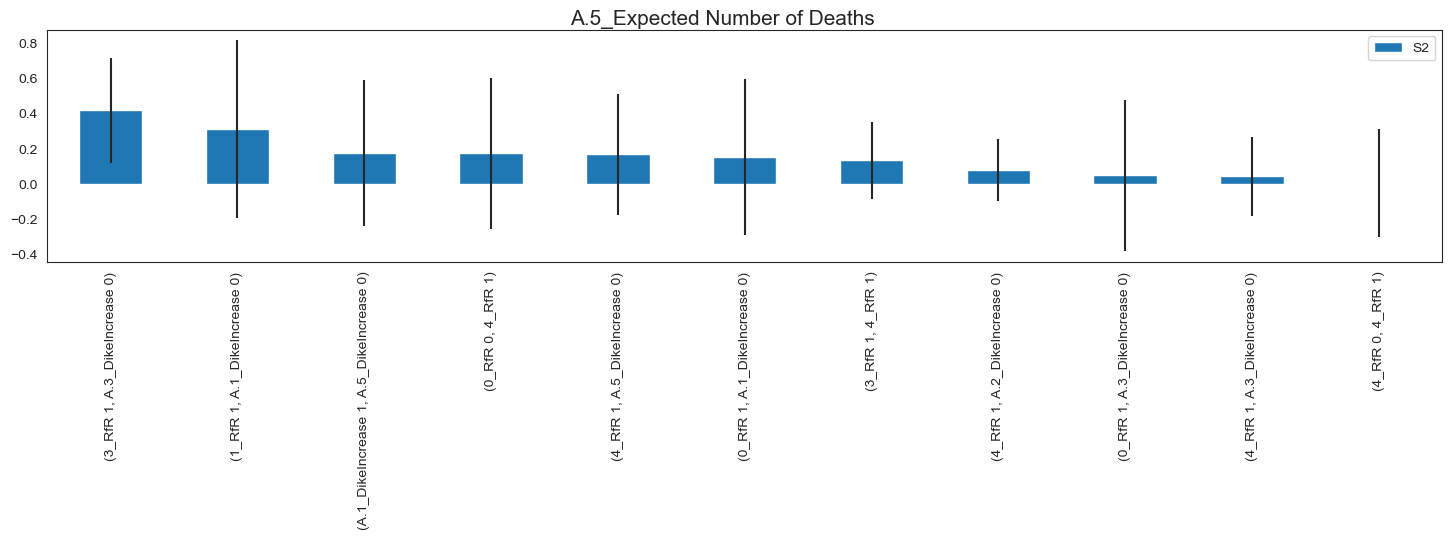

In [20]:
Si_filter_s2 = {k: Si[k] for k in ['S2', 'S2_conf']}
S2_df = pd.DataFrame(flatten_dict_arrays(Si_filter_s2), index=list(itertools.product(problem['names'], repeat=2)))

# Filter to only show rows where the mean S2 is positive and sort ascending
S2_df_positive = S2_df[S2_df['S2'] > 0].sort_values(by='S2', ascending=False)

# Visualize Sobol indices (only positive mean S2, ascending order)
sns.set_style('white')
fig, ax = plt.subplots(1)

indices, err = S2_df_positive[["S2"]], S2_df_positive[['S2_conf']]

indices.plot.bar(yerr=err.values.T, ax=ax)
fig.suptitle(outcome_var, fontsize=15, y=0.93)
fig.set_size_inches(18, 4)
fig.subplots_adjust(bottom=0.3)
plt.show()

In [21]:
outcome_var = 'A.4_Expected Number of Deaths'
problem = get_SALib_problem(levers)

Si = sobol.analyze(problem, outcomes_s[outcome_var], print_to_console=True, calc_second_order=True)

/opt/anaconda3/envs/school/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                          ST   ST_conf
0_RfR 0             0.473972  0.093008
0_RfR 1             0.868872  0.220399
1_RfR 0             0.366435  0.095182
1_RfR 1             0.766002  0.189024
2_RfR 0             0.594934  0.093276
2_RfR 1             0.327350  0.075035
3_RfR 0             0.925726  0.221277
3_RfR 1             0.626250  0.126787
4_RfR 0             0.529539  0.119851
4_RfR 1             1.204546  0.358445
A.1_DikeIncrease 0  0.722494  0.115770
A.1_DikeIncrease 1  0.541897  0.162322
A.2_DikeIncrease 0  0.535179  0.110237
A.2_DikeIncrease 1  0.920615  0.223351
A.3_DikeIncrease 0  0.890179  0.208281
A.3_DikeIncrease 1  0.910356  0.232751
A.4_DikeIncrease 0  0.443794  0.111172
A.4_DikeIncrease 1  1.252972  0.347120
A.5_DikeIncrease 0  0.875264  0.218328
A.5_DikeIncrease 1  0.826670  0.150424
EWS_DaysToThreat    0.480770  0.110535
                          S1   S1_conf
0_RfR 0            -0.114856  0.087816
0_RfR 1            -0.091297  0.079149
1_RfR 0            -0.191

/opt/anaconda3/envs/school/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


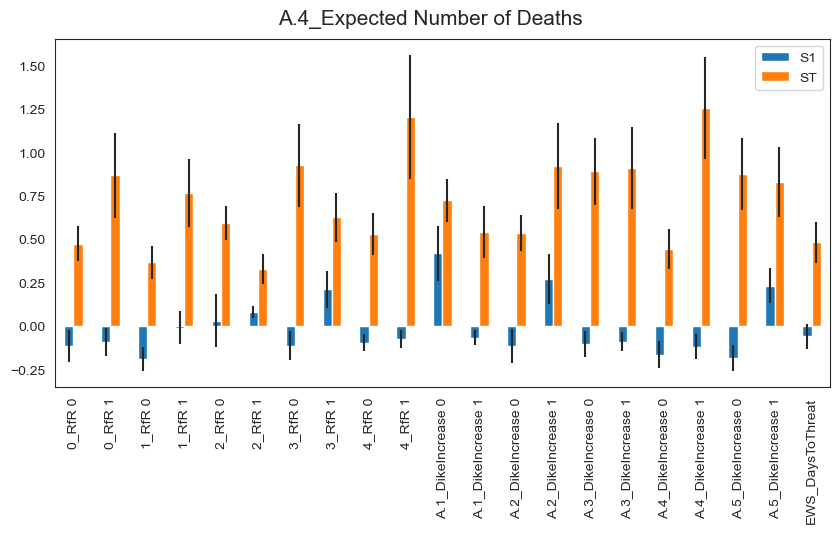

In [22]:
# Prepare Sobol Variables
problem = get_SALib_problem(levers)
outcome_var = 'A.4_Expected Number of Deaths'
Si = sobol.analyze(problem, outcomes_s[outcome_var], print_to_console=False)

# Process Dataframe: Filter S1+ST
Si_filter_s1_st = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter_s1_st, index= problem['names'])

# Visualize Sobol indices
sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.suptitle(outcome_var, fontsize=15, y=0.93)
fig.set_size_inches(10,6)
fig.subplots_adjust(bottom=0.3)

plt.show()

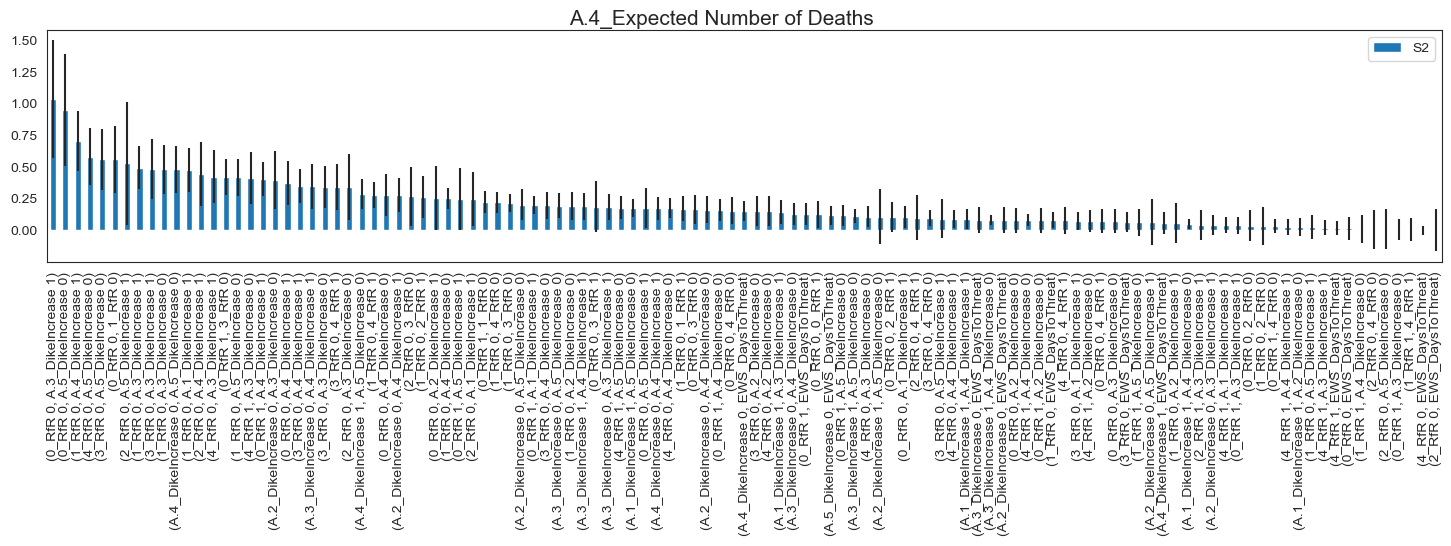

In [23]:
Si_filter_s2 = {k: Si[k] for k in ['S2', 'S2_conf']}
S2_df = pd.DataFrame(flatten_dict_arrays(Si_filter_s2), index=list(itertools.product(problem['names'], repeat=2)))

# Filter to only show rows where the mean S2 is positive and sort ascending
S2_df_positive = S2_df[S2_df['S2'] > 0].sort_values(by='S2', ascending=False)

# Visualize Sobol indices (only positive mean S2, ascending order)
sns.set_style('white')
fig, ax = plt.subplots(1)

indices, err = S2_df_positive[["S2"]], S2_df_positive[['S2_conf']]

indices.plot.bar(yerr=err.values.T, ax=ax)
fig.suptitle(outcome_var, fontsize=15, y=0.93)
fig.set_size_inches(18, 4)
fig.subplots_adjust(bottom=0.3)
plt.show()

In [24]:
experiments_s

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.5_DikeIncrease 0,A.5_DikeIncrease 1,EWS_DaysToThreat,scenario,policy,model
0,75,75.565215,1.0,0.063970,306.055608,1.5,0.424369,107.678364,1.0,0.486637,...,5,1,7,4,0,6,0,2816,0,dikesnet
1,130,316.092458,1.0,0.021155,331.177777,1.5,0.612404,287.144294,10.0,0.546950,...,5,1,7,4,0,6,0,2817,0,dikesnet
2,32,342.068866,10.0,0.776700,115.250789,1.5,0.818461,283.688032,10.0,0.712031,...,5,1,7,4,0,6,0,2818,0,dikesnet
3,113,71.614978,10.0,0.666056,138.324685,1.5,0.784494,123.138250,1.5,0.725479,...,5,1,7,4,0,6,0,2819,0,dikesnet
4,52,119.548865,10.0,0.093357,87.100557,1.0,0.897627,343.887918,1.5,0.516309,...,5,1,7,4,0,6,0,2820,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180219,125,126.923514,10.0,0.360375,77.341980,1.5,0.350922,326.170750,10.0,0.857314,...,8,10,7,8,3,6,4,2875,2815,dikesnet
180220,72,235.199201,1.0,0.108703,252.346186,10.0,0.548287,118.707470,1.0,0.946354,...,8,10,7,8,3,6,4,2876,2815,dikesnet
180221,107,178.244608,1.5,0.038521,294.509588,1.0,0.538400,40.169675,1.5,0.432882,...,8,10,7,8,3,6,4,2877,2815,dikesnet
180222,96,91.007939,1.5,0.626300,102.565375,10.0,0.980786,175.221444,1.5,0.397207,...,8,10,7,8,3,6,4,2878,2815,dikesnet


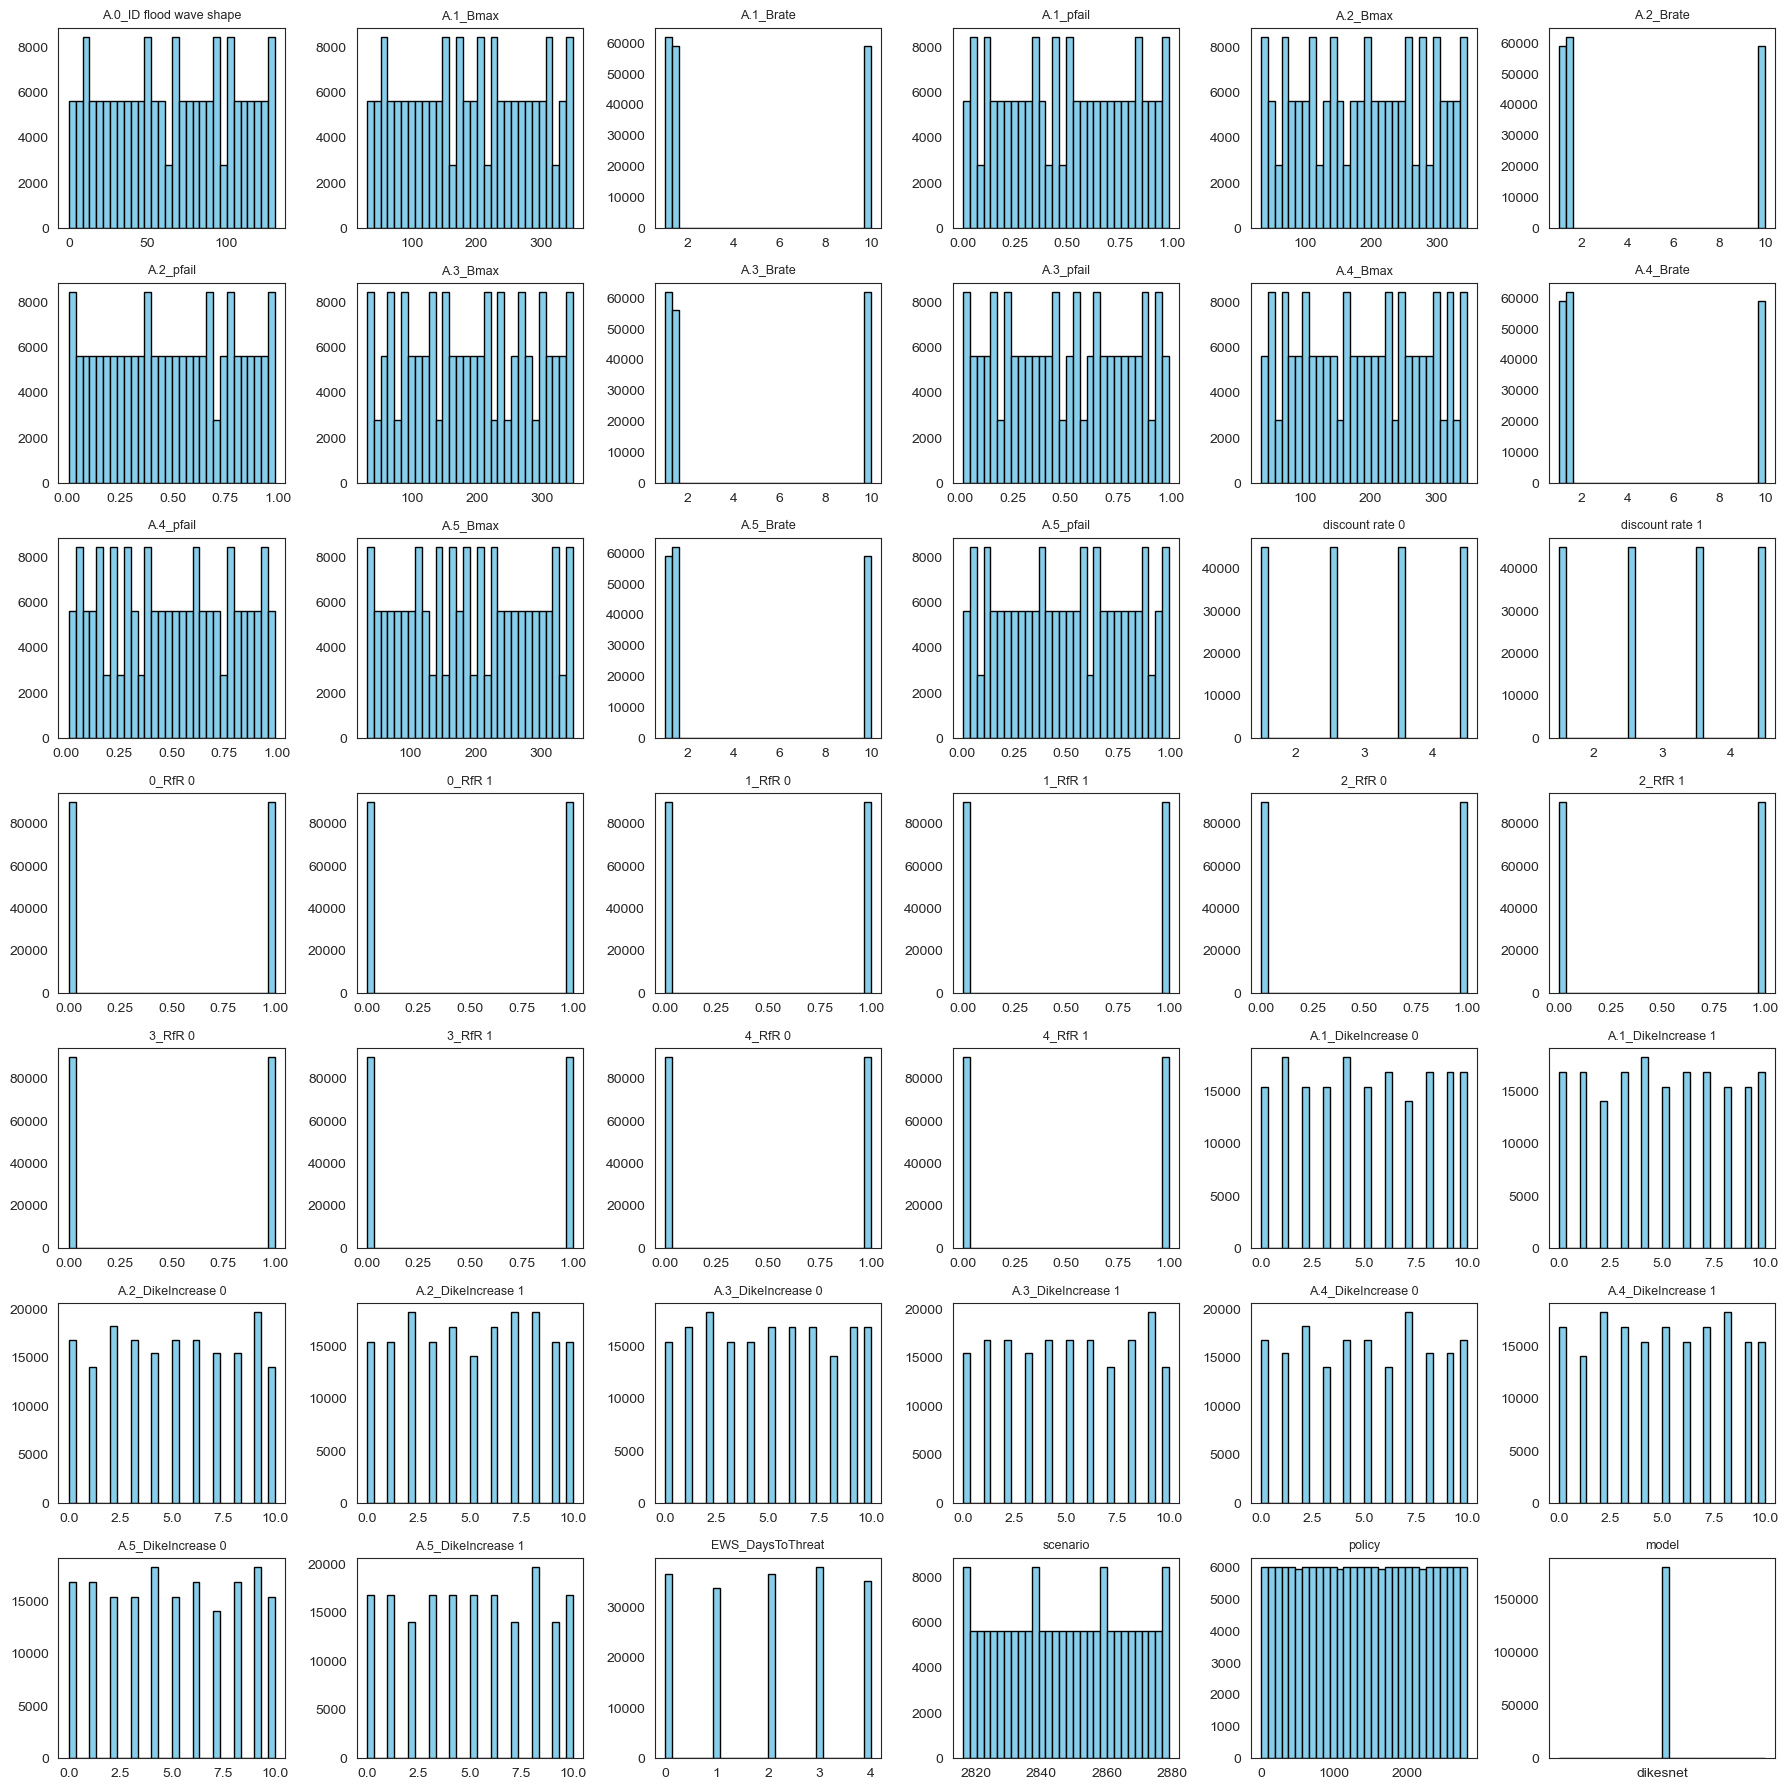

In [27]:
n_cols = 6
n_rows = 7
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 18))
axes = axes.flatten()

for i, col in enumerate(experiments_s.columns):
    ax = axes[i]
    ax.hist(experiments_s[col], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(col, fontsize=9)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Hide any unused subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [3]:
results_ = load_results('results/GSA_PF6_S64_P128_.tar.gz')
experiments_, outcomes_ = results_

[MainProcess/INFO] results loaded successfully from /Users/racheldelvin/Desktop/epa141a-flood-policy-optimization-overijssel/final assignment/results/GSA_PF6_S64_P128_.tar.gz


In [5]:
outcome_var = 'A.4_Expected Number of Deaths'
problem = get_SALib_problem(levers)

Si = sobol.analyze(problem, outcomes_[outcome_var], print_to_console=True, calc_second_order=True)

/opt/anaconda3/envs/school/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                          ST   ST_conf
0_RfR 0             0.645120  0.152649
0_RfR 1             0.614626  0.193268
1_RfR 0             0.336431  0.106927
1_RfR 1             0.394900  0.119292
2_RfR 0             0.864936  0.164756
2_RfR 1             0.614132  0.201944
3_RfR 0             0.952005  0.266726
3_RfR 1             0.338172  0.119309
4_RfR 0             0.856870  0.209712
4_RfR 1             0.753507  0.225356
A.1_DikeIncrease 0  0.807472  0.276381
A.1_DikeIncrease 1  0.414178  0.131255
A.2_DikeIncrease 0  0.835886  0.220016
A.2_DikeIncrease 1  0.237279  0.071473
A.3_DikeIncrease 0  0.979301  0.276180
A.3_DikeIncrease 1  0.397741  0.163095
A.4_DikeIncrease 0  0.621529  0.209999
A.4_DikeIncrease 1  0.776950  0.215111
A.5_DikeIncrease 0  0.961262  0.324387
A.5_DikeIncrease 1  0.391091  0.134434
EWS_DaysToThreat    0.763915  0.199373
                          S1   S1_conf
0_RfR 0             0.775554  0.154510
0_RfR 1             0.027020  0.026684
1_RfR 0             0.048

/opt/anaconda3/envs/school/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


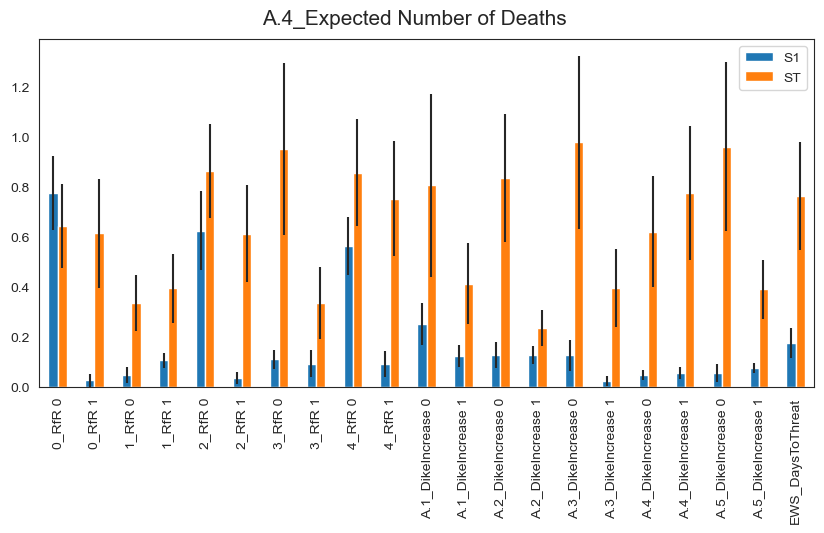

In [6]:
# Prepare Sobol Variables
problem = get_SALib_problem(levers)
outcome_var = 'A.4_Expected Number of Deaths'
Si = sobol.analyze(problem, outcomes_[outcome_var], print_to_console=False)

# Process Dataframe: Filter S1+ST
Si_filter_s1_st = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter_s1_st, index= problem['names'])

# Visualize Sobol indices
sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.suptitle(outcome_var, fontsize=15, y=0.93)
fig.set_size_inches(10,6)
fig.subplots_adjust(bottom=0.3)

plt.show()

In [7]:
outcome_var = 'A.4_Expected Annual Damage'
problem = get_SALib_problem(levers)

Si = sobol.analyze(problem, outcomes_[outcome_var], print_to_console=True, calc_second_order=True)

/opt/anaconda3/envs/school/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                          ST   ST_conf
0_RfR 0             0.810515  0.092409
0_RfR 1             0.816079  0.155876
1_RfR 0             0.404163  0.072567
1_RfR 1             0.270696  0.048949
2_RfR 0             1.024885  0.137652
2_RfR 1             0.705364  0.141664
3_RfR 0             0.977223  0.178317
3_RfR 1             0.233701  0.040775
4_RfR 0             1.003901  0.119945
4_RfR 1             0.916843  0.166160
A.1_DikeIncrease 0  0.862260  0.177546
A.1_DikeIncrease 1  0.288858  0.061472
A.2_DikeIncrease 0  1.001846  0.167887
A.2_DikeIncrease 1  0.411094  0.062003
A.3_DikeIncrease 0  0.977096  0.202546
A.3_DikeIncrease 1  0.267779  0.054616
A.4_DikeIncrease 0  0.768490  0.137922
A.4_DikeIncrease 1  0.932397  0.158963
A.5_DikeIncrease 0  1.001512  0.206399
A.5_DikeIncrease 1  0.269755  0.045245
EWS_DaysToThreat    0.926704  0.159079
                          S1   S1_conf
0_RfR 0             0.986748  0.084432
0_RfR 1             0.011729  0.014671
1_RfR 0             0.010

/opt/anaconda3/envs/school/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


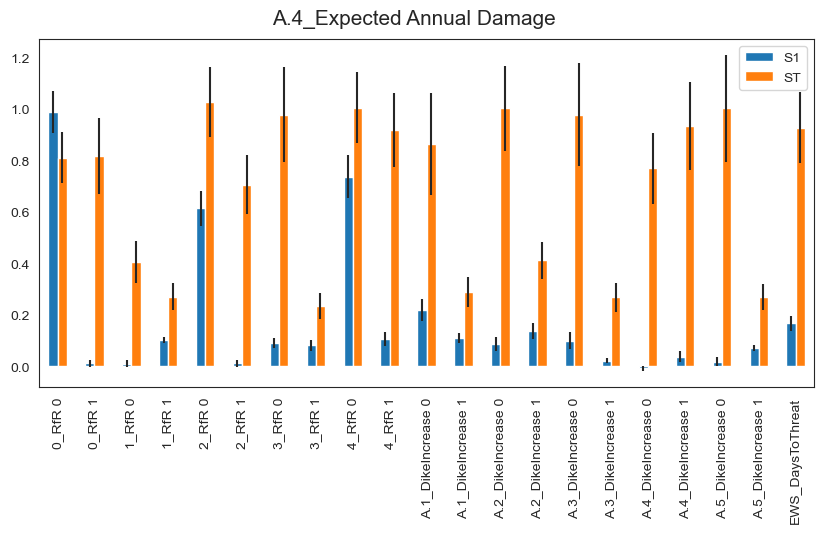

In [8]:
# Prepare Sobol Variables
problem = get_SALib_problem(levers)
outcome_var = 'A.4_Expected Annual Damage'
Si = sobol.analyze(problem, outcomes_[outcome_var], print_to_console=False)

# Process Dataframe: Filter S1+ST
Si_filter_s1_st = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter_s1_st, index= problem['names'])

# Visualize Sobol indices
sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.suptitle(outcome_var, fontsize=15, y=0.93)
fig.set_size_inches(10,6)
fig.subplots_adjust(bottom=0.3)

plt.show()

In [9]:
outcome_var = 'A.5_Expected Annual Damage'
problem = get_SALib_problem(levers)

Si = sobol.analyze(problem, outcomes_[outcome_var], print_to_console=True, calc_second_order=True)

/opt/anaconda3/envs/school/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                          ST   ST_conf
0_RfR 0             0.383268  0.041237
0_RfR 1             0.566176  0.044030
1_RfR 0             0.629709  0.068219
1_RfR 1             1.060430  0.079788
2_RfR 0             0.562589  0.052139
2_RfR 1             0.447405  0.045804
3_RfR 0             1.008527  0.079027
3_RfR 1             0.944601  0.098552
4_RfR 0             0.658482  0.049448
4_RfR 1             0.442530  0.049496
A.1_DikeIncrease 0  0.516705  0.065261
A.1_DikeIncrease 1  0.603559  0.071902
A.2_DikeIncrease 0  0.562805  0.057114
A.2_DikeIncrease 1  0.565169  0.054492
A.3_DikeIncrease 0  0.920384  0.070651
A.3_DikeIncrease 1  0.993459  0.100422
A.4_DikeIncrease 0  0.559403  0.050364
A.4_DikeIncrease 1  0.506301  0.057969
A.5_DikeIncrease 0  0.904944  0.081843
A.5_DikeIncrease 1  1.039292  0.098249
EWS_DaysToThreat    0.635596  0.050851
                          S1   S1_conf
0_RfR 0            -0.036388  0.017037
0_RfR 1             0.166824  0.051181
1_RfR 0            -0.032

/opt/anaconda3/envs/school/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


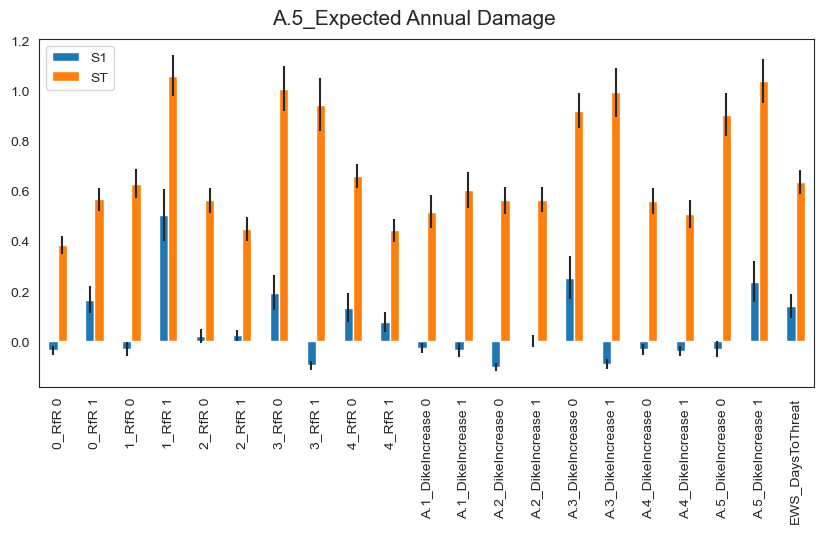

In [10]:
# Prepare Sobol Variables
problem = get_SALib_problem(levers)
outcome_var = 'A.5_Expected Annual Damage'
Si = sobol.analyze(problem, outcomes_[outcome_var], print_to_console=False)

# Process Dataframe: Filter S1+ST
Si_filter_s1_st = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter_s1_st, index= problem['names'])

# Visualize Sobol indices
sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.suptitle(outcome_var, fontsize=15, y=0.93)
fig.set_size_inches(10,6)
fig.subplots_adjust(bottom=0.3)

plt.show()

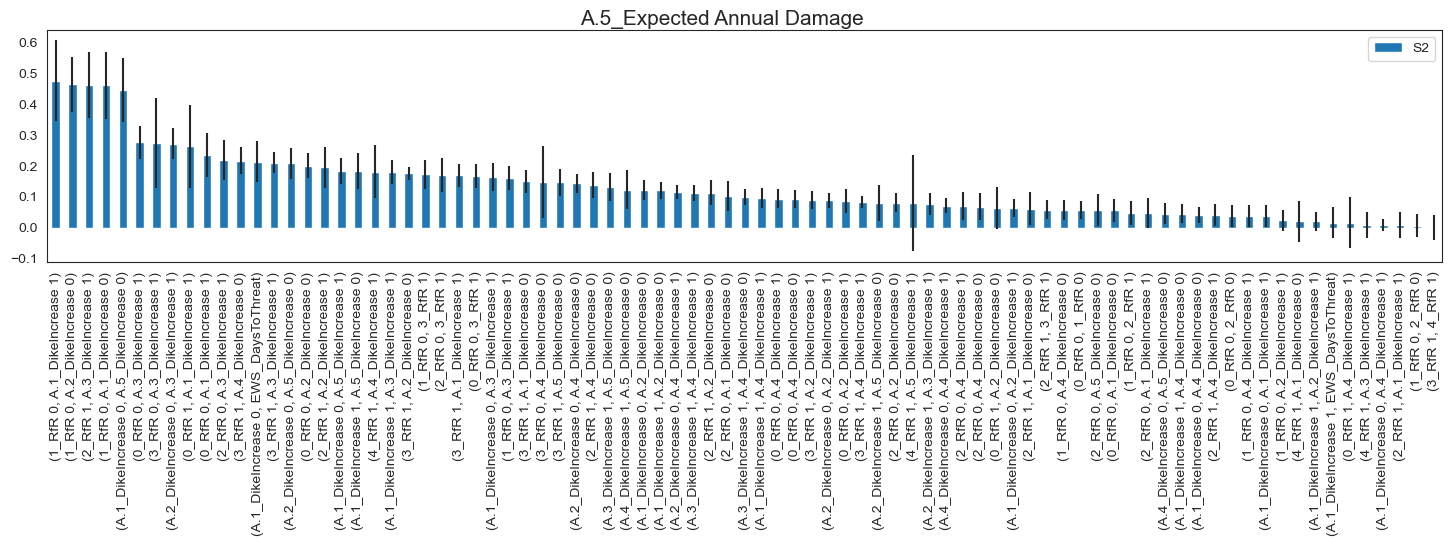

In [15]:
Si_filter_s2 = {k: Si[k] for k in ['S2', 'S2_conf']}
S2_df = pd.DataFrame(flatten_dict_arrays(Si_filter_s2), index=list(itertools.product(problem['names'], repeat=2)))

# Filter to only show rows where the mean S2 is positive and sort ascending
S2_df_positive = S2_df[S2_df['S2'] > 0].sort_values(by='S2', ascending=False)

# Visualize Sobol indices (only positive mean S2, ascending order)
sns.set_style('white')
fig, ax = plt.subplots(1)

indices, err = S2_df_positive[["S2"]], S2_df_positive[['S2_conf']]

indices.plot.bar(yerr=err.values.T, ax=ax)
fig.suptitle(outcome_var, fontsize=15, y=0.93)
fig.set_size_inches(18, 4)
fig.subplots_adjust(bottom=0.3)
plt.show()

In [16]:
outcome_var = 'A.5_Expected Number of Deaths'
problem = get_SALib_problem(levers)

Si = sobol.analyze(problem, outcomes_[outcome_var], print_to_console=True, calc_second_order=True)

/opt/anaconda3/envs/school/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                          ST   ST_conf
0_RfR 0             0.284790  0.063971
0_RfR 1             0.507083  0.070938
1_RfR 0             0.504944  0.119474
1_RfR 1             0.860636  0.099546
2_RfR 0             0.529197  0.088003
2_RfR 1             0.409995  0.079072
3_RfR 0             1.015803  0.188870
3_RfR 1             0.771913  0.168161
4_RfR 0             0.611996  0.103082
4_RfR 1             0.321249  0.071031
A.1_DikeIncrease 0  0.604095  0.151817
A.1_DikeIncrease 1  0.478770  0.131521
A.2_DikeIncrease 0  0.503794  0.096377
A.2_DikeIncrease 1  0.494191  0.086804
A.3_DikeIncrease 0  0.856174  0.109088
A.3_DikeIncrease 1  0.781871  0.128307
A.4_DikeIncrease 0  0.494458  0.081555
A.4_DikeIncrease 1  0.429426  0.102592
A.5_DikeIncrease 0  0.860796  0.164340
A.5_DikeIncrease 1  0.817694  0.146705
EWS_DaysToThreat    0.595912  0.092638
                          S1   S1_conf
0_RfR 0            -0.052600  0.039663
0_RfR 1             0.176854  0.122921
1_RfR 0            -0.042

/opt/anaconda3/envs/school/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


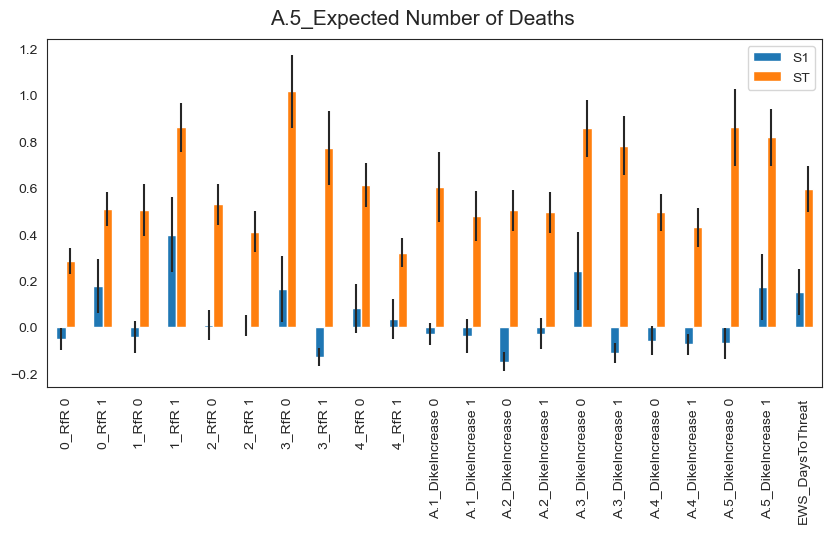

In [17]:
# Prepare Sobol Variables
problem = get_SALib_problem(levers)
outcome_var = 'A.5_Expected Number of Deaths'
Si = sobol.analyze(problem, outcomes_[outcome_var], print_to_console=False)

# Process Dataframe: Filter S1+ST
Si_filter_s1_st = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter_s1_st, index= problem['names'])

# Visualize Sobol indices
sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.suptitle(outcome_var, fontsize=15, y=0.93)
fig.set_size_inches(10,6)
fig.subplots_adjust(bottom=0.3)

plt.show()

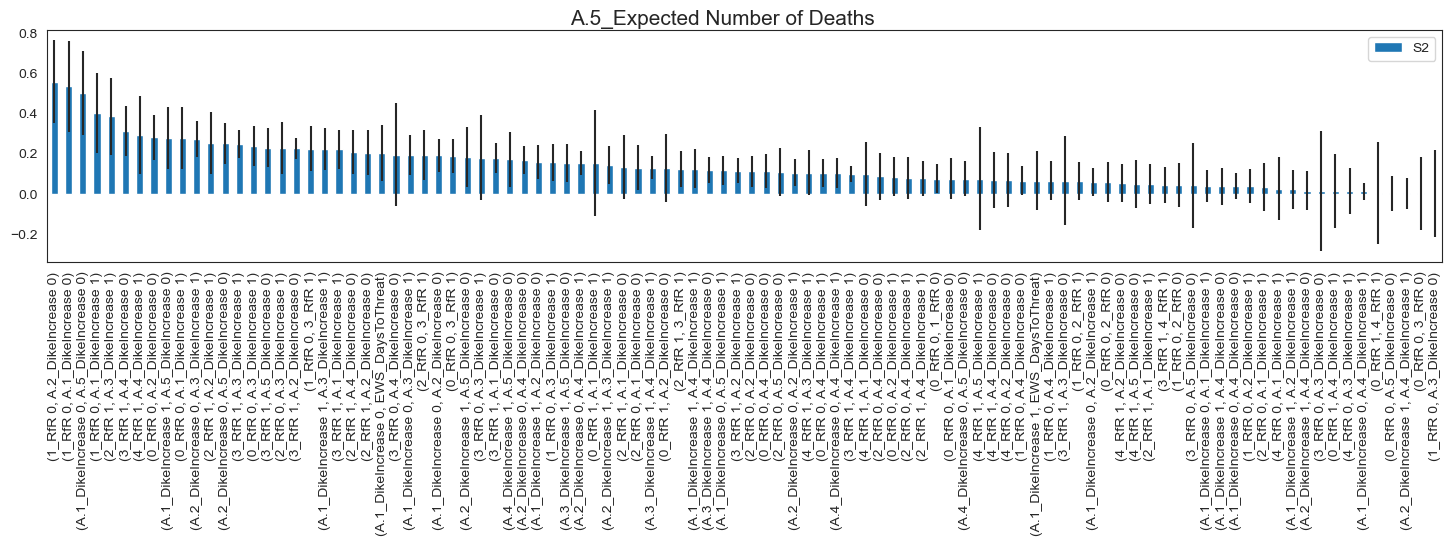

In [18]:
Si_filter_s2 = {k: Si[k] for k in ['S2', 'S2_conf']}
S2_df = pd.DataFrame(flatten_dict_arrays(Si_filter_s2), index=list(itertools.product(problem['names'], repeat=2)))

# Filter to only show rows where the mean S2 is positive and sort ascending
S2_df_positive = S2_df[S2_df['S2'] > 0].sort_values(by='S2', ascending=False)

# Visualize Sobol indices (only positive mean S2, ascending order)
sns.set_style('white')
fig, ax = plt.subplots(1)

indices, err = S2_df_positive[["S2"]], S2_df_positive[['S2_conf']]

indices.plot.bar(yerr=err.values.T, ax=ax)
fig.suptitle(outcome_var, fontsize=15, y=0.93)
fig.set_size_inches(18, 4)
fig.subplots_adjust(bottom=0.3)
plt.show()